In [1]:
import pandas as pd
import os,sys, imp, glob
sys.path.append('./src/')
import doc_utils_clean as doc_utils
import feature_utils, common_utils
import defines
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn_crfsuite.utils import flatten

In [2]:
dir_name="duplicate"

### Find example of lemma and sentece

# Check most common lemmas

In [3]:
imp.reload(common_utils)
sent_pos_db =  common_utils.concat_dbs(dir_name,"sent_pos_db",[],'db_idx')#['LEMMA','FORM','sent_idx','POSTAG'],'db_idx')
sent_pos_db

,file_idx,db_idx,FROM,sent_idx,TO,FORM,LEMMA,CPOSTAG,POSTAG,FEATS,TOKEN,f_gen,f_num,f_per,f_suf_gen,f_suf_num,f_suf_per,f_tense,doc_idx
0,1,0,0,0.000000,1,אז,אז,RB,RB,_,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
1,1,1,1,0.000000,2,היום,היום,RB,RB,_,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
2,1,2,2,0.000000,3,אנחנו,הוא,PRP,PRP,gen=F|gen=M|num=P|per=1,3,M,P,1,NaN,NaN,NaN,NaN,1.000000
3,1,3,3,0.000000,4,נפגשים,נפגש,BN,BN,gen=M|num=P|per=A,4,M,P,A,NaN,NaN,NaN,NaN,1.000000
4,1,4,4,0.000000,5,פה,פה,NNP,NNP,gen=M|num=S,5,M,S,NaN,NaN,NaN,NaN,NaN,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553912,80,5827,0,529.000000,1,היה,היה,COP,COP,gen=M|num=S|per=3,1,M,S,3,NaN,NaN,NaN,NaN,NaN
553913,80,5828,1,529.000000,2,ל,ל,IN,IN,_,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
553914,80,5829,2,529.000000,3,אני,אני,S_PRN,S_PRN,gen=F|gen=M|num=S|per=1,2,M,S,1,NaN,NaN,NaN,NaN,NaN
553915,80,5830,3,529.000000,4,מאוד,מאוד,RB,RB,_,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
sent_pos_db[sent_pos_db['POSTAG']=='VB']['FORM'].count_values()

AttributeError: 'Series' object has no attribute 'count_values'

In [52]:
sent_db

,doc_idx,db_idx,text,is_nar,sent_pos_in_par
0,1,0,אז היום אנחנו נפגשים פה ב 123 אבל שבוע הבא בח...,0.000000,1.000000
1,1,1,כן,0.000000,1.000000
2,1,2,אוקיי מה שלומך,0.000000,1.000000
3,1,3,ברוך השם,0.000000,1.000000
4,1,4,מחר יש לכם יום טיול,0.000000,1.000000
...,...,...,...,...,...
38429,80,525,שאני מרגיש בהם לא נוח,0.000000,0.666667
38430,80,526,אז כאילו למה למה אני מתגעגע,0.000000,0.833333
38431,80,527,או למה אני למה אני רוצה,0.000000,1.000000
38432,80,528,והצלחת לענות לעצמך,0.000000,1.000000


In [196]:
imp.reload(common_utils)
sent_lemma_db =  common_utils.concat_dbs(dir_name,"sent_lemma_db",[],'db_idx')#['LEMMA','FORM','sent_idx','POSTAG'],'db_idx')
sent_lemma_db=sent_lemma_db.merge(sent_db,left_on=['doc_idx','db_idx'],right_on=['doc_idx','db_idx'],validate='one_to_one')

In [197]:
sent_lemma_db

,doc_idx,db_idx,sent_lemma,text,is_nar
0,1,0,אז היום הוא נפגש פה ב _ אבל שבוע ה בא ב חמישי,אז היום אנחנו נפגשים פה ב 123 אבל שבוע הבא בח...,0.000000
1,1,1,כן,כן,0.000000
2,1,2,אוקיי מה ש לום,אוקיי מה שלומך,0.000000
3,1,3,ב ה רוך ה שם,ברוך השם,0.000000
4,1,4,מחר יש ל אתם יום טיול,מחר יש לכם יום טיול,0.000000
...,...,...,...,...,...
38429,80,525,ש הוא הרגיש ב ה הוא לא נוח,שאני מרגיש בהם לא נוח,0.000000
38430,80,526,אז כאילו למה למה הוא התגעגע,אז כאילו למה למה אני מתגעגע,0.000000
38431,80,527,או למה הוא למה הוא רצה,או למה אני למה אני רוצה,0.000000
38432,80,528,ו ה צלחת ענה ל ה עצמו,והצלחת לענות לעצמך,0.000000


In [119]:
sent_lemma_db[sent_lemma_db['sent_lemma'].str.contains(' הולדת ')].groupby('is_nar').size()

is_nar
0.000000     4
1.000000    18
dtype: int64

In [17]:
sent_db= common_utils.concat_dbs(dir_name,"sent_db",['is_nar','text','sent_pos_in_par'],'db_idx')

In [18]:
sent_db

,doc_idx,db_idx,text,is_nar,sent_pos_in_par
0,1,0,אז היום אנחנו נפגשים פה ב 123 אבל שבוע הבא בח...,0.000000,1.000000
1,1,1,כן,0.000000,1.000000
2,1,2,אוקיי מה שלומך,0.000000,1.000000
3,1,3,ברוך השם,0.000000,1.000000
4,1,4,מחר יש לכם יום טיול,0.000000,1.000000
...,...,...,...,...,...
38429,80,525,שאני מרגיש בהם לא נוח,0.000000,0.666667
38430,80,526,אז כאילו למה למה אני מתגעגע,0.000000,0.833333
38431,80,527,או למה אני למה אני רוצה,0.000000,1.000000
38432,80,528,והצלחת לענות לעצמך,0.000000,1.000000


<AxesSubplot:ylabel='Frequency'>

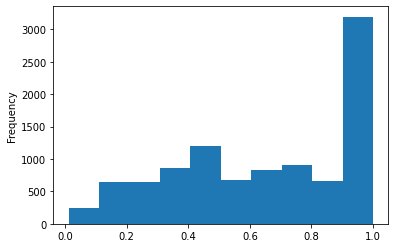

In [24]:
sent_db[sent_db['is_nar']==1]['sent_pos_in_par'].plot(kind='hist')

In [27]:
sent_db[(sent_db['is_nar']==1)&(sent_db['sent_pos_in_par']==1)]

,doc_idx,db_idx,text,is_nar,sent_pos_in_par
24,1,24,אז יש המון בלאגן עכשיו בחברה אז היום טיול הזה ...,1.000000,1.000000
25,1,25,למה,1.000000,1.000000
26,1,26,כי לא נהיה שם בעצם כשכל העובדים יסתובבו שם ויס...,1.000000,1.000000
27,1,27,אה זאת אומרת יש עובדים שנשארים ומסדרים הכל,1.000000,1.000000
28,1,28,יש קבלים כאלה כן שבאו לשים קירות גבס וכל מיני ...,1.000000,1.000000
...,...,...,...,...,...
38178,80,274,מה אמרת לה שהתקשרת פעם שנייה,1.000000,1.000000
38189,80,285,כזה ולא ולא דיברנו על זה,1.000000,1.000000
38358,80,454,אז זה זה ה זה העניין,1.000000,1.000000
38360,80,456,אולי המצב הזה של להגיע ולא להגיד כלום זה שוב ...,1.000000,1.000000


In [25]:
np.percentile(sent_db[sent_db['is_nar']==1]['sent_pos_in_par'],70)

0.9482758620689656

In [187]:
word=' ש״י'

In [188]:
sent_db[sent_db['text'].str.contains(word)].count()

doc_idx    58
db_idx     58
text       58
is_nar     58
dtype: int64

In [189]:
sent_db[sent_db['text'].str.contains(word)]['text']

9633     אני גם מרגישה ש היו לך השנה הרבה דברים שנחתכו ...
9660                                 היא חברה טובה של ש״י 
9699                   ומה עם שאר החברות של ש״י  הן כן היו
9727         החברה הזאת של ש״י  באה עם אג׳נדה שונה לחלוטין
9730       זהו אז זה מעניין מה מה  ש״י רצתה בכל הסיפור הזה
9731        לא אז ש״י התעצבנה עליה  כאילו היא התעצבנה עליה
9733     היא אמרה לה את זה היא יצאה עליה וטוב שככה כי א...
9742                                וגם ש״י העדיפה ליד מים
9746               אז איך ש״י הרגישה בסוף עם המסיבת רווקות
9750     כאילו והיא בסך הכל חשבה על עצמה היא לא חשבה על...
9759     אבל גם כל הקטע עם ש״י  קצת הפריע לי כאילו קצת ...
9778                             מעניין מה ש״י מרגישה אליה
9785              דיבור מה כל אחד מעדיף מה בכלל ש״י מעדיפה
9804                    חברה שלך והיא תהיה מקסימום עם ש״י 
9812     כאילו היא מבחינתה אני מבחינתי אין לי אין לי ב...
9857                                היא אמרה ביקורת על ש״י
9879     שזה שזה גם מייצג את הרצונות של ש״י  וזה חשוב ז.

In [198]:
sent_db[sent_db['text'].str.contains(word)].groupby('is_nar').size()

is_nar
0.000000    25
1.000000    33
dtype: int64

In [199]:
doc_with_word_idx=sent_db[sent_db['text'].str.contains(word)].groupby('doc_idx').size().index.tolist()
db_with_word = doc_db[doc_db['doc_idx_from_name'].isin(doc_with_word_idx)][['client','session','doc_idx_from_name']]
db_with_word.nunique()

client               2
session              8
doc_idx_from_name    8
dtype: int64

In [200]:
lemma='הולדת'

In [201]:
sent_lemma_db[sent_lemma_db['sent_lemma'].str.contains(lemma)].count()

doc_idx       26
db_idx        26
sent_lemma    26
text          26
is_nar        26
dtype: int64

In [202]:
sent_lemma_db[sent_lemma_db['sent_lemma'].str.contains(lemma)].groupby('is_nar').size()

is_nar
0.000000     6
1.000000    20
dtype: int64

In [203]:
doc_with_lemma_idx=sent_lemma_db[sent_lemma_db['sent_lemma'].str.contains(lemma)].groupby('doc_idx').size().index.tolist()
doc_with_lemma_idx = doc_db[doc_db['doc_idx_from_name'].isin(doc_with_word_idx)][['client','session','doc_idx_from_name']]
doc_with_lemma_idx.nunique()

client               2
session              8
doc_idx_from_name    8
dtype: int64

In [204]:
def get_label_for_pos(x):
    doc_idx=x['doc_idx']
    sent_idx=x['sent_idx']
    return sent_db.loc[((sent_db['doc_idx']==doc_idx)&(sent_db['db_idx']==sent_idx)),'is_nar']

In [205]:
sent_pos_db['is_nar']=sent_pos_db.apply(get_label_for_pos)

KeyError: 'doc_idx'

In [227]:
sent_pos_db['f_per'].unique()
sent_pos_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553917 entries, 0 to 553916
Data columns (total 19 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   file_idx   553917 non-null  int64  
 1   db_idx     553917 non-null  int64  
 2   FROM       553917 non-null  int64  
 3   sent_idx   553917 non-null  float64
 4   TO         553917 non-null  int64  
 5   FORM       553917 non-null  object 
 6   LEMMA      553917 non-null  object 
 7   CPOSTAG    553917 non-null  object 
 8   POSTAG     553917 non-null  object 
 9   FEATS      553917 non-null  object 
 10  TOKEN      553917 non-null  int64  
 11  f_gen      266687 non-null  object 
 12  f_num      266695 non-null  object 
 13  f_per      155604 non-null  object 
 14  f_suf_gen  4735 non-null    object 
 15  f_suf_num  4735 non-null    object 
 16  f_suf_per  4735 non-null    float64
 17  f_tense    27893 non-null   object 
 18  doc_idx    38434 non-null   float64
dtypes: float64(3), int64(5)

# Sample PoS TAGS

In [78]:
postag='A'
is_nar=0

In [79]:
sent_pos_label[(sent_pos_label['is_nar']==is_nar)&(sent_pos_label['f_per']==postag)]['FORM'].value_counts().reset_index()[:10]

,index,FORM
0,יודע,1296
1,רוצה,1248
2,אומרת,1195
3,חושב,1044
4,יודעת,1012
5,אומר,839
6,צריך,797
7,מרגיש,790
8,יכול,727
9,חושבת,715


# Find tag for word

In [152]:
word='עתי'
is_nar=1

In [158]:
sent_pos_label[(sent_pos_label['is_nar']==is_nar)&(sent_pos_label['FORM'].str.contains(word))]['FORM'].value_counts().reset_index()[:10]

,index,FORM
0,ידעתי,73
1,הגעתי,65
2,שמעתי,24
3,דעתי,22
4,נסעתי,15
5,שעתיים,12
6,קבעתי,10
7,נפגעתי,8
8,עתיד,5
9,הודעתי,5


# Find word for lemma

In [139]:
lemma='חלום'

In [140]:
sent_pos_label[(sent_pos_label['is_nar']==is_nar)&(sent_pos_label['LEMMA']==lemma)]['FORM'].value_counts().reset_index()[:10]

,index,FORM
0,חלומות,16
1,חלום,14
2,חלומותייך,1


In [141]:
word='חלומות'

In [145]:
with pd.option_context('display.max_colwidth', None):
    display(sent_db[(sent_db['is_nar']==is_nar)&(sent_db['text'].str.contains(word))])

,doc_idx,db_idx,text,is_nar,sent_pos_in_par
9479,16,290,לא ציפיתי בכלל לא דמיינתי בחלומות הכי וורודים שאני אתקבל למקום עבודה כזה,1.000000,0.176471
15071,29,35,כן הקודם היו כל מיני חלומות כאלה ישנתי כזה מוטרד,1.000000,0.142857
15204,29,168,ושאלתי את עצמי והיה לי חלומות בלילה עליה מפה עד הודעה חדשה ממש כל מיני וזה כאילו קצת מרגיש לי שאני הולכת להיות כמו סנצו פנצו כזה שוליית הקוסם כזה,1.000000,0.200000
15205,29,169,שהיא בחלומות היתי באור הזרקורים כל מיני כתבים שבאים כן הנה אני מספר,1.000000,0.266667
15640,30,79,וגם הוא הופיע לי בחלומות,1.000000,0.636364
15646,30,85,XXX שכל הזמן זה בא וזה מפריע לי החלומות האלה,1.000000,0.250000
15649,30,88,אז אני כבר אומר לעצמי וואלה עדיף כבר למות עם החלומות עם חלומות כאלה,1.000000,1.000000
20604,45,146,איך איך זה היה לך שהיו לך חלומות ואבא שלך היה מגיע,1.000000,1.000000
26082,58,170,אין אין מקום שאת יודעת שזה עבודת אה חלומותייך,1.000000,0.700000
29404,64,137,כן אה זהו דיברנו פעם שעברה על חלומות אני עדיין יש לי,1.000000,0.500000


In [59]:
sent_pos_label=sent_pos_db.merge(sent_db,left_on=['file_idx','sent_idx'],right_on=['doc_idx','db_idx'],validate='many_to_one')

In [60]:
sent_pos_label

,db_idx_x,FROM,TO,FORM,LEMMA,CPOSTAG,POSTAG,FEATS,TOKEN,f_gen,...,f_suf_gen,f_suf_num,f_suf_per,f_tense,doc_idx_x,doc_idx_y,db_idx_y,text,is_nar,sent_pos_in_par
0,0,0,1,אז,אז,RB,RB,_,1,NaN,...,NaN,NaN,NaN,NaN,1.000000,1,0,אז היום אנחנו נפגשים פה ב 123 אבל שבוע הבא בח...,0.000000,1.000000
1,1,1,2,היום,היום,RB,RB,_,2,NaN,...,NaN,NaN,NaN,NaN,1.000000,1,0,אז היום אנחנו נפגשים פה ב 123 אבל שבוע הבא בח...,0.000000,1.000000
2,2,2,3,אנחנו,הוא,PRP,PRP,gen=F|gen=M|num=P|per=1,3,M,...,NaN,NaN,NaN,NaN,1.000000,1,0,אז היום אנחנו נפגשים פה ב 123 אבל שבוע הבא בח...,0.000000,1.000000
3,3,3,4,נפגשים,נפגש,BN,BN,gen=M|num=P|per=A,4,M,...,NaN,NaN,NaN,NaN,1.000000,1,0,אז היום אנחנו נפגשים פה ב 123 אבל שבוע הבא בח...,0.000000,1.000000
4,4,4,5,פה,פה,NNP,NNP,gen=M|num=S,5,M,...,NaN,NaN,NaN,NaN,1.000000,1,0,אז היום אנחנו נפגשים פה ב 123 אבל שבוע הבא בח...,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553912,5827,0,1,היה,היה,COP,COP,gen=M|num=S|per=3,1,M,...,NaN,NaN,NaN,NaN,NaN,80,529,היה לי מאוד קשה,0.000000,1.000000
553913,5828,1,2,ל,ל,IN,IN,_,2,NaN,...,NaN,NaN,NaN,NaN,NaN,80,529,היה לי מאוד קשה,0.000000,1.000000
553914,5829,2,3,אני,אני,S_PRN,S_PRN,gen=F|gen=M|num=S|per=1,2,M,...,NaN,NaN,NaN,NaN,NaN,80,529,היה לי מאוד קשה,0.000000,1.000000
553915,5830,3,4,מאוד,מאוד,RB,RB,_,3,NaN,...,NaN,NaN,NaN,NaN,NaN,80,529,היה לי מאוד קשה,0.000000,1.000000


In [47]:
sent_pos_count_db.query('POSTAG_INTJ!=0 & POSTAG_NNP!=0 & POSTAG_REL!=0')[['doc_idx','sent_idx']]

,doc_idx,sent_idx
551,1,551
639,2,26
1321,3,56
1390,3,125
1399,3,134
...,...,...
38055,80,151
38094,80,190
38118,80,214
38131,80,227


In [50]:
sent_pos_db.set_index(['file_idx','sent_idx'],inplace=True)

In [51]:
sent_pos_db.loc[(1,551),:]

db_idx  FROM  TO     FORM  LEMMA CPOSTAG POSTAG  \
file_idx sent_idx                                                      
1        551.000000    7308     0   1      אממ    אממ     NNP    NNP   
         551.000000    7309     0   1      אני    הוא     PRP    PRP   
         551.000000    7310     1   2     מחפש   חיפש      BN     BN   
         551.000000    7311     2   3       אה     אה    INTJ   INTJ   
         551.000000    7312     0   1    להגיד   הגיד      VB     VB   
         551.000000    7313     1   2  פתרונות  פתרון      NN     NN   
         551.000000    7314     2   3       זה     זה     PRP    PRP   
         551.000000    7315     3   4       לא     לא      RB     RB   
         551.000000    7316     4   5     יהיה    היה     COP    COP   
         551.000000    7317     5   6     נכון   נכון      JJ     JJ   
         551.000000    7318     6   7       כי     כי      CC     CC   
         551.000000    7319     7   8      אני    הוא     PRP    PRP   
         551.000000    7320     8   9       לא     לא      RB     RB   
         551.000000    7321     9  10     מצפה   ציפה      BN     BN   
         551.000000    7322    10  11        ש      ש     REL    REL   
         551.000000    7323    11  12     יהיה    היה     COP    COP   
         551.000000    7324    12  13    פתרון  פתרון      NN     NN   
         551.000000    7325    13  14      אחד    אחד      CD     CD   

                                       FEATS  TOKEN f_gen f_num f_per  \
file_idx sent_idx                                                       
1        551.000000        gen=F|gen=M|num=S      1     M     S   NaN   
         551.000000  gen=F|gen=M|num=S|per=1      1     M     S     1   
         551.000000        gen=M|num=S|per=A      2     M     S     A   
         551.000000                        _      3   NaN   NaN   NaN   
         551.000000                        _      1   NaN   NaN   NaN   
         551.000000              gen=M|num=P      2     M     P   NaN   
         551.000000        gen=M|num=S|per=3      3     M     S     3   
         551.000000                        _      4   NaN   NaN   NaN   
         551.000000        gen=M|num=S|per=3      5     M     S     3   
         551.000000              gen=M|num=S      6     M     S   NaN   
         551.000000                        _      7   NaN   NaN   NaN   
         551.000000  gen=F|gen=M|num=S|per=1      8     M     S     1   
         551.000000                        _      9   NaN   NaN   NaN   
         551.000000        gen=F|num=S|per=A     10     F     S     A   
         551.000000                        _     11   NaN   NaN   NaN   
         551.000000        gen=M|num=S|per=3     11     M     S     3   
         551.000000              gen=M|num=S     12     M     S   NaN   
         551.000000              gen=M|num=S     13     M     S   NaN   

                    f_suf_gen f_suf_num  f_suf_per f_tense  doc_idx  
file_idx sent_idx                                                    
1        551.000000       NaN       NaN        NaN     NaN      NaN  
         551.000000       NaN       NaN        NaN     NaN      NaN  
         551.000000       NaN       NaN        NaN     NaN      NaN  
         551.000000       NaN       NaN        NaN     NaN      NaN  
         551.000000       NaN       NaN        NaN     NaN      NaN  
         551.000000       NaN       NaN        NaN     NaN      NaN  
         551.000000       NaN       NaN        NaN     NaN      NaN  
         551.000000       NaN       NaN        NaN     NaN      NaN  
         551.000000       NaN       NaN        NaN     NaN      NaN  
         551.000000       NaN       NaN        NaN     NaN      NaN  
         551.000000       NaN       NaN        NaN     NaN      NaN  
         551.000000       NaN       NaN        NaN     NaN      NaN  
         551.000000       NaN       NaN        NaN     NaN      NaN  
         551.000000       NaN       NaN        NaN     NaN      NaN  

In [35]:
list_db=pd.DataFrame(sent_pos_db.groupby(['file_idx','sent_idx'])['POSTAG'].apply(list))
list_db

POSTAG
file_idx sent_idx                                                     
1        0.000000    [RB, RB, PRP, BN, NNP, NNP, CD, CC, NN, DEF, J...
         1.000000                                                 [RB]
         2.000000                                   [NNP, QW, REL, NN]
         3.000000                      [PREPOSITION, DEF, NN, DEF, RB]
         4.000000                         [RB, EX, IN, S_PRN, NNT, NN]
...                                                                ...
80       525.000000      [REL, PRP, BN, PREPOSITION, DEF, PRP, RB, JJ]
         526.000000                          [RB, CC, QW, QW, PRP, BN]
         527.000000                         [CC, QW, PRP, QW, PRP, BN]
         528.000000         [CONJ, DEF, NN, VB, PREPOSITION, DEF, PRP]
         529.000000                           [COP, IN, S_PRN, RB, RB]

[38434 rows x 1 columns]

In [209]:
doc_db=common_utils.load_db(dir_name,'doc_db')

Opened /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/doc_db.csv,  index False


In [210]:
doc_with_kibuts=sent_pos_db[sent_pos_db['FORM']== 'קיבוץ'].groupby('file_idx').size().index.tolist()
doc_with_kibuts

[8, 20, 22, 23, 25, 27, 32, 73]

In [211]:
doc_with_kibuts=sent_pos_db[sent_pos_db['FORM'].str.contains('קפטריה')].groupby('file_idx').size().index.tolist()
doc_with_kibuts

[]

In [212]:
doc_db[doc_db['doc_idx_from_name'].isin(doc_with_kibuts)][['client','session','doc_idx_from_name']]

,client,session,doc_idx_from_name


In [213]:
ids = doc_db[['client','session']]
doc_db[ids.isin(ids[ids.duplicated()])].sort_values("session").dropna(how='all')


,path,file_name,doc_idx_from_name,par_count,sent_count,nar_sent_count,client,session


In [214]:
import re

def extract_name(x):
    name_num=x.split('_')[1]
    num=''.join(filter(str.isdigit, name_num))
    name=re.sub(num,'',name_num)
    return name.lower()

def extract_num(x):
    name_num=x.split('_')
    num=''.join(filter(str.isdigit, name_num[1]))
    if not num:
        num=''.join(filter(str.isdigit, name_num[2]))
    return int(num)

doc_db['client']=doc_db['file_name'].apply(extract_name)
doc_db['session']=doc_db['file_name'].apply(extract_num)

In [48]:
doc_db

,path,file_name,doc_idx_from_name,par_count,sent_count,nar_sent_count,client,session
0,/scratch/sim_reg6/users/zsofya/classroom/MSc/p...,01_aingimel3_lc.docx,1.000000,205.000000,613.000000,256.000000,aingimel,3
1,/scratch/sim_reg6/users/zsofya/classroom/MSc/p...,02_aingimel12_lc.docx,2.000000,157.000000,652.000000,70.000000,aingimel,12
2,/scratch/sim_reg6/users/zsofya/classroom/MSc/p...,03_aingimel26_lc.docx,3.000000,118.000000,682.000000,102.000000,aingimel,26
3,/scratch/sim_reg6/users/zsofya/classroom/MSc/p...,04_nun2_lc.docx,4.000000,132.000000,471.000000,173.000000,nun,2
4,/scratch/sim_reg6/users/zsofya/classroom/MSc/p...,05_kafhey_23_lc.docx,5.000000,65.000000,513.000000,210.000000,kafhey,23
...,...,...,...,...,...,...,...,...
75,/scratch/sim_reg6/users/zsofya/classroom/MSc/p...,77_nun25_Mor.docx,77.000000,176.000000,439.000000,64.000000,nun,25
76,/scratch/sim_reg6/users/zsofya/classroom/MSc/p...,78_tsadek27_Mor.docx,78.000000,122.000000,186.000000,40.000000,tsadek,27
77,/scratch/sim_reg6/users/zsofya/classroom/MSc/p...,79_tsadek29_Mor.docx,79.000000,173.000000,259.000000,67.000000,tsadek,29
78,/scratch/sim_reg6/users/zsofya/classroom/MSc/p...,80_nun28_Mor.docx,80.000000,225.000000,530.000000,113.000000,nun,28


In [49]:
common_utils.save_db(doc_db,dir_name,"doc_db")

Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/doc_db.csv, 
index False
float_format %.5f


In [67]:
client_db=pd.DataFrame()
doc_db_sorted=doc_db.sort_values(by=['client','session']).copy()
client_db['client']=doc_db_sorted[['client']]
client_db['session']=doc_db_sorted[['session']]
client_db['doc_idx']=doc_db_sorted[['doc_idx_from_name']]
client_db.isna().any()

client     False
session    False
doc_idx    False
dtype: bool

In [66]:
common_utils.save_db(client_db,dir_name,"client_db")

Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/client_db.csv, 
index False
float_format %.5f


### Find words with different forms that gave same lemmas

In [72]:
sent_pos_db[sent_pos_db['LEMMA']=="זכר"].drop_duplicates("FORM")

,doc_idx,db_idx,sent_idx,FORM,LEMMA,POSTAG
1948,1,1948,169.000000,זוכרת,זכר,BN
1956,1,1956,170.000000,זוכר,זכר,BN
8539,2,365,37.000000,זכרתי,זכר,VB
24955,4,2840,243.000000,לזכור,זכר,VB
111109,16,4217,248.000000,זכרנו,זכר,NN
131700,19,29,7.000000,זכרת,זכר,VB
137110,19,5439,265.000000,זכר,זכר,VB
173373,24,4866,352.000000,זוכרים,זכר,BN
209970,29,5593,361.000000,תזכור,זכר,VB
340487,48,3429,315.000000,זכור,זכר,BN


### Found example of PoS counter per sentence

In [270]:
sent_pos_db_2=common_utils.load_db(dir_name, "02_sent_pos_db")

Opened /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/02_sent_pos_db.csv,  index False


In [273]:
common_utils.save_db(sent_pos_db_2.query('sent_idx==604'),dir_name,"selected_sent")

Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/selected_sent.csv,  index False


In [11]:
with pd.option_context('display.max_columns', None):
    display(merged_db.query('doc_idx==1 and merged_idx==541'))

NameError: name 'merged_db' is not defined

In [278]:
sent_pos_db_2.query('sent_idx==605')

,FROM,sent_idx,TO,FORM,LEMMA,CPOSTAG,POSTAG,FEATS,TOKEN,f_gen,f_num,f_per,f_tense,f_suf_gen,f_suf_num,f_suf_per,doc_idx
6260,0,605.000000,1,ל,ל,PREPOSITION,PREPOSITION,_,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6261,1,605.000000,2,ה,ה,DEF,DEF,_,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6262,2,605.000000,3,זה,זה,PRP,PRP,gen=M|num=S|per=3,1,M,S,3,NaN,NaN,NaN,NaN,NaN
6263,3,605.000000,4,אני,הוא,PRP,PRP,gen=F|gen=M|num=S|per=1,2,M,S,1,NaN,NaN,NaN,NaN,NaN
6264,4,605.000000,5,מחפש,חיפש,BN,BN,gen=M|num=S|per=A,3,M,S,A,NaN,NaN,NaN,NaN,NaN
6265,5,605.000000,6,פיתרון,פתרון,NNT,NNT,gen=M|num=S,4,M,S,NaN,NaN,NaN,NaN,NaN,NaN


In [274]:
sent_pos_db_1=common_utils.load_db(dir_name, "01_sent_pos_db")

Opened /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/01_sent_pos_db.csv,  index False


In [326]:
sent_pos_db_1.query('sent_idx==307')

,FROM,sent_idx,TO,FORM,LEMMA,CPOSTAG,POSTAG,FEATS,TOKEN,f_gen,f_num,f_per,f_suf_gen,f_suf_num,f_suf_per,f_tense,doc_idx
3524,0,307.000000,1,אני,הוא,PRP,PRP,gen=F|gen=M|num=S|per=1,1,M,S,1,NaN,NaN,NaN,NaN,NaN
3525,1,307.000000,2,לא,לא,RB,RB,_,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3526,2,307.000000,3,בטוח,בטוח,JJ,JJ,gen=M|num=S,3,M,S,NaN,NaN,NaN,NaN,NaN,NaN
3527,3,307.000000,4,ש,ש,REL,REL,_,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3528,4,307.000000,5,סיפרתי,סיפר,VB,VB,gen=F|gen=M|num=S|per=1|tense=PAST,4,M,S,1,NaN,NaN,NaN,PAST,NaN
3529,5,307.000000,6,את,את,AT,AT,_,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3530,6,307.000000,7,זה,זה,PRP,PRP,gen=M|num=S|per=3,6,M,S,3,NaN,NaN,NaN,NaN,NaN


In [325]:
common_utils.save_db(sent_pos_db_1.query('sent_idx==307'),dir_name,"selected_lemma")

Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/stat.csv,  index False


In [320]:
with pd.option_context('display.max_columns', None):
    display(merged_db.query('doc_idx==1 and merged_idx==307'))

,doc_idx,merged_idx,is_question,is_nar,par_idx_in_doc,par_pos_in_doc,sent_len,is_client,sent_idx_in_par,sent_pos_in_par,sent_pos_in_doc,TOKEN,POSTAG_ADVERB,POSTAG_AT,POSTAG_BN,POSTAG_BNT,POSTAG_CC,POSTAG_CD,POSTAG_CDT,POSTAG_CONJ,POSTAG_COP,POSTAG_DEF,POSTAG_DT,POSTAG_DTT,POSTAG_EX,POSTAG_IN,POSTAG_INTJ,POSTAG_JJ,POSTAG_JJT,POSTAG_MD,POSTAG_NN,POSTAG_NNP,POSTAG_NNT,POSTAG_P,POSTAG_POS,POSTAG_PREPOSITION,POSTAG_PRP,POSTAG_QW,POSTAG_RB,POSTAG_REL,POSTAG_S_PRN,POSTAG_TEMP,POSTAG_VB,f_gen_F,f_gen_M,f_num_D,f_num_P,f_num_S,f_suf_gen_F,f_suf_gen_M,f_suf_num_P,f_suf_num_S,f_suf_per_1.0,f_suf_per_2.0,f_suf_per_3.0,f_per_1,f_per_2,f_per_3,f_per_A,f_tense_BEINONI,f_tense_FUTURE,f_tense_IMPERATIVE,f_tense_PAST,POSTAG_NEG,POSTAG_yyCM,POSTAG_TTL
307,1,307,0.000000,1.000000,125.000000,0.614634,25.000000,1,11,0.206897,0.502447,6,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.166667,0.166667,0.000000,0.000000,0.166667,0.000000,0.666667,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.166667,NaN,NaN,NaN


In [332]:
headers = merged_db.query('doc_idx==1 and merged_idx==307').iloc[0]
new_df  = pd.DataFrame(merged_db.query('doc_idx==1 and merged_idx==307').values[1:], columns=headers)
new_df

307,1.000000,307.000000,0.000000,1.000000,125.000000,0.614634,25.000000,1.000000,11.000000,0.206897,0.502447,6.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.166667,0.166667,0.000000,0.000000,0.166667,0.000000,0.666667,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.166667,NaN,NaN,NaN


In [298]:
merged_db.iloc[merged_db['f_tense_PAST'].idxmax(),:]

doc_idx               12.000000
merged_idx           258.000000
is_question            0.000000
is_nar                 1.000000
par_idx_in_doc        65.000000
                        ...    
f_tense_IMPERATIVE     0.000000
f_tense_PAST           2.000000
POSTAG_NEG                  NaN
POSTAG_yyCM                 NaN
POSTAG_TTL                  NaN
Name: 6595, Length: 66, dtype: float64

In [315]:
sent_label_db.query('doc_idx==1 and is_nar==1 and nar_idx==6')

,file_idx,sent_idx,is_question,text,sent_idx_in_block,block_idx,is_nar,doc_idx,par_db_idx,par_idx_in_doc,par_pos_in_doc,par_type,block_type,nar_idx,sent_len,is_client,sent_idx_in_par,sent_pos_in_par,sent_pos_in_doc
306,1,306,0.000000,פעם היה איזה כשהגעתי לחברה בערך חצי שנה אחרי...,0.000000,133.000000,1.000000,1.000000,125.000000,125.000000,0.614634,client,start,6.000000,109.000000,1,10,0.189655,0.500816
307,1,307,0.000000,אני לא בטוח שסיפרתי את זה,1.000000,133.000000,1.000000,1.000000,125.000000,125.000000,0.614634,client,start,6.000000,25.000000,1,11,0.206897,0.502447
308,1,308,0.000000,ו שאלו מי מגיע מי מגיע וזה,2.000000,133.000000,1.000000,1.000000,125.000000,125.000000,0.614634,client,start,6.000000,27.000000,1,12,0.224138,0.504078
309,1,309,0.000000,ואז הגיעו אליי עוד הייתי עם כל הלבוש הדוסי הזה...,3.000000,133.000000,1.000000,1.000000,125.000000,125.000000,0.614634,client,start,6.000000,102.000000,1,13,0.241379,0.505710
310,1,310,0.000000,תבוא תבוא יהיה נחמד אתה תראה מה זה,4.000000,133.000000,1.000000,1.000000,125.000000,125.000000,0.614634,client,start,6.000000,34.000000,1,14,0.258621,0.507341
311,1,311,0.000000,תראה מה זה,5.000000,133.000000,1.000000,1.000000,125.000000,125.000000,0.614634,client,start,6.000000,10.000000,1,15,0.275862,0.508972
312,1,312,1.000000,ולא אז עוד לא ידעתי מה זה ולא וחשבתי על זה טוב...,6.000000,133.000000,1.000000,1.000000,125.000000,125.000000,0.614634,client,start,6.000000,75.000000,1,16,0.293103,0.510604
313,1,313,0.000000,ואז הלכתי ו ואמרתי ההורים שלי שאלו אותי מה זה,7.000000,133.000000,1.000000,1.000000,125.000000,125.000000,0.614634,client,start,6.000000,45.000000,1,17,0.310345,0.512235
314,1,314,0.000000,אמרתי להם שהולכים לאיזו מסעדה בתל אביב ידעתי ש...,8.000000,133.000000,1.000000,1.000000,125.000000,125.000000,0.614634,client,start,6.000000,74.000000,1,18,0.327586,0.513866
315,1,315,0.000000,והלכתי לשם וזה היה איזשהו בר למפרע התברר שזה מ...,9.000000,133.000000,1.000000,1.000000,125.000000,125.000000,0.614634,client,start,6.000000,86.000000,1,19,0.344828,0.515498


In [84]:
sent_label_db[sent_label_db['text'].str.contains('כלל')].groupby('is_nar').size()

is_nar
0.000000    495
1.000000    183
dtype: int64

In [307]:
sent_label_db.query('doc_idx == 12 and sent_idx==259')['text'].tolist()

['והם עזבו  באותו שלב איזה  123  בחורים ככה מיד עזבו']

In [7]:
sent_label_db = common_utils.concat_dbs(dir_name,"sent_db")

In [43]:
sent_pos_count_db =  common_utils.concat_dbs(dir_name,"sent_pos_count_db")

In [248]:
sent_label_db[sent_label_db['text'].str.contains('הבעיות שלי סובבות סביב')]

,file_idx,sent_idx,is_question,text,sent_idx_in_block,block_idx,is_nar,doc_idx,par_db_idx,par_idx_in_doc,par_pos_in_doc,par_type,block_type,nar_idx,sent_len,is_client,sent_idx_in_par,sent_pos_in_par,sent_pos_in_doc
1217,2,604,0.000000,זה אומר ש זה בעצם הבעיות שלי סובבות סביב זה,0.000000,158.000000,0.000000,2.000000,151.000000,151.000000,0.968153,client,not_nar,0.000000,45.000000,1,0,0.500000,0.927914
34788,71,607,0.000000,זה אומר ש זה בעצם הבעיות שלי סובבות סביב זה,0.000000,157.000000,0.000000,71.000000,151.000000,151.000000,0.968153,client,not_nar,0.000000,45.000000,1,0,0.500000,0.928244


In [49]:
sent_label_db.query('file_idx==1 and sent_idx==219')['text'].tolist()

[' נאי זוכר סתם איזו סיטואציה שישבנו מול הטלוויזיה אני ואחותי ואני זוכר שצבטתי אותה']

In [247]:
sent_pos_db.query('doc_idx==1 and sent_idx==219')

,doc_idx,db_idx,sent_idx,FORM,LEMMA,POSTAG
2454,1,2454,219.000000,נאי,נאה,JJT
2455,1,2455,219.000000,זוכר,זכר,BN
2456,1,2456,219.000000,סתם,סתם,RB
2457,1,2457,219.000000,איזו,איזה,QW
2458,1,2458,219.000000,סיטואציה,סיטואציה,NN
2459,1,2459,219.000000,ש,ש,REL
2460,1,2460,219.000000,ישבנו,יישב,VB
2461,1,2461,219.000000,מול,מול,IN
2462,1,2462,219.000000,ה,ה,DEF
2463,1,2463,219.000000,טלוויזיה,טלוויזיה,NN


### Find example of non-narrative

In [ ]:
with pd.option_context('display.max_colwidth', None,'display.max_rows', None): 
    display(sent_label_db.loc[120:129,:])

### Compare merged and non-merged sentences

In [26]:
no_merged_db = common_utils.concat_dbs('reparse_no_merge',"sent_lemma_db")

In [32]:
no_merged_db

,doc_idx,sent_idx,sent_lemma
0,1,0,אז היום הוא נפגש פה ב _ אבל שבוע ה בא ב חמישי
1,1,1,כן
2,1,2,אוקיי
3,1,3,מה ש לום
4,1,4,ב ה רוך ה שם
...,...,...,...
46108,80,630,ש הוא הרגיש ב ה הוא לא נוח
46109,80,631,אז כאילו למה למה הוא התגעגע
46110,80,632,או למה הוא למה הוא רצה
46111,80,633,ו ה צלחת ענה ל ה עצמו


In [28]:
no_merged_db.groupby('doc_idx')['sent_idx'].count()

,sent_idx,sent_lemma
doc_idx,,
1,660,660
2,845,845
3,865,865
4,566,566
5,577,577
...,...,...
76,570,570
77,500,500
78,208,208


In [30]:
sent_label_db.groupby('doc_idx')['sent_idx'].count()

doc_idx
1.000000     613
2.000000     652
3.000000     682
4.000000     471
5.000000     513
            ... 
76.000000    475
77.000000    439
78.000000    186
79.000000    259
80.000000    530
Name: sent_idx, Length: 80, dtype: int64

In [42]:
sent_label_db.loc[1217:1219,'text']

1217    זה אומר ש  זה בעצם  הבעיות שלי סובבות סביב זה
1218                              לזה אני מחפש פיתרון
1219                           זאת אומרת אתה אומר שזה
Name: text, dtype: object

In [44]:
sent_label_db[sent_label_db['text'].str.contains('אחותי')]

,file_idx,sent_idx,is_question,text,sent_idx_in_block,block_idx,is_nar,doc_idx,par_db_idx,par_idx_in_doc,par_pos_in_doc,par_type,block_type,nar_idx,sent_len,is_client,sent_idx_in_par,sent_pos_in_par,sent_pos_in_doc
184,1,184,0.000000,היא יש לי תמיד אני מרגיש כאילו זה מישהו שעשיתי...,3.000000,84.000000,0.000000,1.000000,79.000000,79.000000,0.390244,client,not_nar,0.000000,98.000000,1,3,0.571429,0.301794
219,1,219,0.000000,נאי זוכר סתם איזו סיטואציה שישבנו מול הטלוויז...,0.000000,107.000000,1.000000,1.000000,101.000000,101.000000,0.497561,client,start,4.000000,81.000000,1,1,0.285714,0.358891
220,1,220,0.000000,ואז התברר לי שזאת לא אחותי הזאתי זאת אחותי אחת...,1.000000,107.000000,1.000000,1.000000,101.000000,101.000000,0.497561,client,start,4.000000,165.000000,1,2,0.428571,0.360522
366,1,366,0.000000,כן רק שאחותי זה היה מזמן,0.000000,138.000000,0.000000,1.000000,129.000000,129.000000,0.634146,client,not_nar,0.000000,24.000000,1,0,0.200000,0.598695
2897,5,479,0.000000,היה לי מקרה כזה עם אחותי שגם נורא נפגעתי,0.000000,81.000000,1.000000,5.000000,55.000000,55.000000,0.861538,client,whole,13.000000,40.000000,1,7,0.500000,0.935673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34087,70,154,0.000000,חה לא לא חה היא היא באה מאוד XXX לא לא אה הי...,0.000000,135.000000,1.000000,70.000000,118.000000,118.000000,0.646739,client,whole,10.000000,606.000000,1,0,0.333333,0.625000
37820,78,14,0.000000,אה זה אחותי ואמא שלי לחצו עליי לבקש את זה ממנה...,2.000000,10.000000,1.000000,78.000000,7.000000,7.000000,0.065574,client,start,2.000000,115.000000,1,3,0.800000,0.080645
37839,78,33,0.000000,אבל מה אני עושה יכול להיות היא כן הייתה זה בדי...,3.000000,24.000000,1.000000,78.000000,19.000000,19.000000,0.163934,client,whole,3.000000,574.000000,1,4,0.714286,0.182796
37881,78,75,0.000000,זאת אומרת לא לא רציתי לפגוע בה אה אה היה לי מ...,2.000000,54.000000,1.000000,78.000000,47.000000,47.000000,0.393443,client,end,4.000000,1004.000000,1,2,0.750000,0.408602


## Display statistic of sentences for thesis

In [3]:
merged_db=common_utils.concat_dbs(dir_name,'merged_db')
merged_db.columns.tolist()

['doc_idx',
 'merged_idx',
 'is_question',
 'is_nar',
 'par_idx_in_doc',
 'par_pos_in_doc',
 'sent_len',
 'is_client',
 'sent_idx_in_par',
 'sent_pos_in_par',
 'sent_pos_in_doc',
 'TOKEN',
 'POSTAG_ADVERB',
 'POSTAG_AT',
 'POSTAG_BN',
 'POSTAG_BNT',
 'POSTAG_CC',
 'POSTAG_CD',
 'POSTAG_CDT',
 'POSTAG_CONJ',
 'POSTAG_COP',
 'POSTAG_DEF',
 'POSTAG_DT',
 'POSTAG_DTT',
 'POSTAG_EX',
 'POSTAG_IN',
 'POSTAG_INTJ',
 'POSTAG_JJ',
 'POSTAG_JJT',
 'POSTAG_MD',
 'POSTAG_NN',
 'POSTAG_NNP',
 'POSTAG_NNT',
 'POSTAG_P',
 'POSTAG_POS',
 'POSTAG_PREPOSITION',
 'POSTAG_PRP',
 'POSTAG_QW',
 'POSTAG_RB',
 'POSTAG_REL',
 'POSTAG_S_PRN',
 'POSTAG_TEMP',
 'POSTAG_VB',
 'f_gen_F',
 'f_gen_M',
 'f_num_D',
 'f_num_P',
 'f_num_S',
 'f_suf_gen_F',
 'f_suf_gen_M',
 'f_suf_num_P',
 'f_suf_num_S',
 'f_suf_per_1.0',
 'f_suf_per_2.0',
 'f_suf_per_3.0',
 'f_per_1',
 'f_per_2',
 'f_per_3',
 'f_per_A',
 'f_tense_BEINONI',
 'f_tense_FUTURE',
 'f_tense_IMPERATIVE',
 'f_tense_PAST',
 'POSTAG_NEG',
 'POSTAG_yyCM',
 'POSTAG_

In [4]:
merged_db[['sent_len','TOKEN']].describe()

,sent_len,TOKEN
count,38434.000000,38434.000000
mean,51.014206,9.307696
std,66.563055,9.381784
min,1.000000,1.000000
25%,18.000000,4.000000
50%,33.000000,6.000000
75%,60.000000,12.000000
max,1661.000000,166.000000


In [5]:
merged_db.describe()

,doc_idx,merged_idx,is_question,is_nar,par_idx_in_doc,par_pos_in_doc,sent_len,is_client,sent_idx_in_par,sent_pos_in_par,...,f_per_2,f_per_3,f_per_A,f_tense_BEINONI,f_tense_FUTURE,f_tense_IMPERATIVE,f_tense_PAST,POSTAG_NEG,POSTAG_yyCM,POSTAG_TTL
count,38434.000000,38434.000000,38434.000000,38434.000000,38434.000000,38434.000000,38434.000000,38434.000000,38434.000000,38434.000000,...,38434.000000,38434.000000,38434.000000,38434.000000,38434.000000,38434.000000,38434.000000,8729.000000,2165.000000,186.000000
mean,39.744523,281.077900,0.128506,0.256440,108.973747,0.502813,51.014206,0.638757,3.944502,0.695608,...,0.039345,0.169336,0.093563,0.004495,0.016659,0.002591,0.049521,0.000181,0.001848,0.001344
std,24.274141,194.479463,0.334657,0.436673,94.066583,0.275359,66.563055,0.480367,7.321337,0.305133,...,0.093112,0.175960,0.120194,0.030153,0.055963,0.031064,0.098084,0.004808,0.042954,0.018331
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.001894,1.000000,0.000000,0.000000,0.011494,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,121.000000,0.000000,0.000000,40.000000,0.277580,18.000000,0.000000,0.000000,0.461538,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,252.000000,0.000000,0.000000,80.000000,0.491948,33.000000,1.000000,1.000000,0.750000,...,0.000000,0.142857,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,63.000000,409.000000,0.000000,1.000000,151.000000,0.736817,60.000000,1.000000,4.000000,1.000000,...,0.000000,0.250000,0.166667,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000
max,80.000000,984.000000,1.000000,1.000000,527.000000,1.000000,1661.000000,1.000000,86.000000,1.000000,...,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,0.200000,1.000000,0.250000


In [6]:
per_label_db={}
per_label_db['Narrative']=merged_db.query('is_nar == 1')
per_label_db['Non-narrative']=merged_db.query('is_nar == 0')

In [7]:
nar_ratio=(per_label_db['Narrative'].shape[0]/merged_db.shape[0])*100
nar_ratio

25.643961076130513

In [8]:
merged_db.groupby(['doc_idx','par_idx_in_doc']).size().reset_index(name='counts')['counts'].mean()

2.556131949986699

In [221]:
def get_percent(a,b):
    return ('{}%'.format(int((a/b)*100)))

# Compare distribution of length

In [59]:
import scipy.stats as stats
import math 

def compare_distrib(col):
    u_res = stats.mannwhitneyu(merged_db.query("is_nar == 1")[col],merged_db.query("is_nar == 0")[col], alternative = 'two-sided')
    n1=merged_db.query("is_nar == 1").shape[0]
    n2=merged_db.query("is_nar == 0").shape[0]
    u_test_db.loc[col,'pvalue'] =  u_res.pvalue
    u_test_db.loc[col,'U'] = u_res.statistic 
    u_test_db.loc[col,'is_diff'] = u_res.pvalue < 0.05
    u_test_db.loc[col,'z']=abs(u_test_db.loc[col,'U']-(n1*n2)/2)/math.sqrt(n1*n2*(n1+n2+1)/12)
    u_test_db.loc[col,'z_site']= (u_test_db.loc[col,'U'] - n1*n2/2 + 0.5) / np.sqrt(n1*n2 * (n1+n2 + 1)/ 12)

In [60]:
u_test_db = pd.DataFrame()


In [62]:
# compare_distrib('TOKEN')
compare_distrib('sent_len')

u_test_db[u_test_db['is_diff'] == True].sort_values(by=['pvalue'],ascending=True)

,pvalue,U,is_diff,z,z_site
TOKEN,0.000000,157413588.000000,True,17.457296,17.457297
sent_len,0.000000,156896913.500000,True,16.913322,16.913323


In [34]:
u_test_db.to_csv(os.getcwd()+'/dataframes/duplicate/mannw_len_token.csv')

In [29]:
stat=pd.DataFrame()
for label in per_label_db.keys():
    stat.loc['Total sentence mumber',label] = int(per_label_db[label].shape[0])
    stat.loc["Client's sentence rartio",label] = get_percent(per_label_db[label]['is_client'].value_counts()[1],per_label_db[label].shape[0])
    stat.loc["Question rartio",label] = get_percent(per_label_db[label]['is_question'].value_counts()[1],per_label_db[label].shape[0])
    stat.loc['Average sentence length (characters)',label] = per_label_db[label]['sent_len'].mean()
    stat.loc['Average sentence length (tokens)',label] = per_label_db[label]['TOKEN'].mean()
    stat.loc['Average paragraph length (sentences)',label] = per_label_db[label].groupby(['doc_idx','par_idx_in_doc']).size().reset_index(name='counts')['counts'].mean()
stat

NameError: name 'get_percent' is not defined

In [223]:
display(stat.round(decimals=2))

,Narrative,Non-narrative
Total sentence mumber,9856.000000,28578.000000
Client's sentence rartio,81%,57%
Question rartio,11%,13%
Average sentence length (characters),58.157366,48.550668
Average sentence length (tokens),10.516437,8.890825
Average paragraph length (sentences),3.294118,2.275137


In [63]:
stat.to_csv(sep='&',line_terminator='\\')

"&Narrative&Non-narrative\\Total sentence mumber&9856.0&28578.0\\Client's sentence rartio&81%&57%\\Question rartio&11%&13%\\Average sentence length (characters)&58.15736607142857&48.550668346280354\\Average sentence length (tokens)&10.516436688311689&8.890825110224648\\Average paragraph length (sentences)&3.2941176470588234&2.2751373298304274\\"

In [64]:
common_utils.save_db(stat,dir_name,"stat",keep_index=False)

Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/stat.csv, 
index False
float_format %.5f


In [65]:
imp.reload(common_utils)
sent_label_db = common_utils.concat_dbs(dir_name,"sent_db")
sent_label_db

,file_idx,sent_idx,is_question,text,sent_idx_in_block,block_idx,is_nar,doc_idx,par_db_idx,par_idx_in_doc,par_pos_in_doc,par_type,block_type,nar_idx,sent_len,is_client,sent_idx_in_par,sent_pos_in_par,sent_pos_in_doc
0,1,0,0.000000,אז היום אנחנו נפגשים פה ב 123 אבל שבוע הבא בח...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.004878,therapist,not_nar,0.000000,50.000000,0,0,1.000000,0.001631
1,1,1,0.000000,כן,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.009756,client,not_nar,0.000000,2.000000,1,0,1.000000,0.003263
2,1,2,1.000000,אוקיי מה שלומך,0.000000,2.000000,0.000000,1.000000,2.000000,2.000000,0.014634,therapist,not_nar,0.000000,16.000000,0,0,1.000000,0.004894
3,1,3,0.000000,ברוך השם,0.000000,3.000000,0.000000,1.000000,3.000000,3.000000,0.019512,client,not_nar,0.000000,8.000000,1,0,1.000000,0.006525
4,1,4,0.000000,מחר יש לכם יום טיול,0.000000,4.000000,0.000000,1.000000,4.000000,4.000000,0.024390,therapist,not_nar,0.000000,19.000000,0,0,1.000000,0.008157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38429,80,525,0.000000,שאני מרגיש בהם לא נוח,3.000000,230.000000,0.000000,80.000000,222.000000,222.000000,0.991111,client,not_nar,0.000000,21.000000,1,3,0.666667,0.992453
38430,80,526,0.000000,אז כאילו למה למה אני מתגעגע,4.000000,230.000000,0.000000,80.000000,222.000000,222.000000,0.991111,client,not_nar,0.000000,27.000000,1,4,0.833333,0.994340
38431,80,527,0.000000,או למה אני למה אני רוצה,5.000000,230.000000,0.000000,80.000000,222.000000,222.000000,0.991111,client,not_nar,0.000000,23.000000,1,5,1.000000,0.996226
38432,80,528,1.000000,והצלחת לענות לעצמך,0.000000,231.000000,0.000000,80.000000,223.000000,223.000000,0.995556,therapist,not_nar,0.000000,19.000000,0,0,1.000000,0.998113


### Check if same document was parsed twice

In [66]:
duplicated=sent_label_db[sent_label_db['text'].str.len() >10]
duplicated=duplicated[duplicated['text'].isin(duplicated['text'].duplicated())].sort_values("text")
duplicated

,file_idx,sent_idx,is_question,text,sent_idx_in_block,block_idx,is_nar,doc_idx,par_db_idx,par_idx_in_doc,par_pos_in_doc,par_type,block_type,nar_idx,sent_len,is_client,sent_idx_in_par,sent_pos_in_par,sent_pos_in_doc


In [67]:
sent_label_db

,file_idx,sent_idx,is_question,text,sent_idx_in_block,block_idx,is_nar,doc_idx,par_db_idx,par_idx_in_doc,par_pos_in_doc,par_type,block_type,nar_idx,sent_len,is_client,sent_idx_in_par,sent_pos_in_par,sent_pos_in_doc
0,1,0,0.000000,אז היום אנחנו נפגשים פה ב 123 אבל שבוע הבא בח...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.004878,therapist,not_nar,0.000000,50.000000,0,0,1.000000,0.001631
1,1,1,0.000000,כן,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.009756,client,not_nar,0.000000,2.000000,1,0,1.000000,0.003263
2,1,2,1.000000,אוקיי מה שלומך,0.000000,2.000000,0.000000,1.000000,2.000000,2.000000,0.014634,therapist,not_nar,0.000000,16.000000,0,0,1.000000,0.004894
3,1,3,0.000000,ברוך השם,0.000000,3.000000,0.000000,1.000000,3.000000,3.000000,0.019512,client,not_nar,0.000000,8.000000,1,0,1.000000,0.006525
4,1,4,0.000000,מחר יש לכם יום טיול,0.000000,4.000000,0.000000,1.000000,4.000000,4.000000,0.024390,therapist,not_nar,0.000000,19.000000,0,0,1.000000,0.008157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38429,80,525,0.000000,שאני מרגיש בהם לא נוח,3.000000,230.000000,0.000000,80.000000,222.000000,222.000000,0.991111,client,not_nar,0.000000,21.000000,1,3,0.666667,0.992453
38430,80,526,0.000000,אז כאילו למה למה אני מתגעגע,4.000000,230.000000,0.000000,80.000000,222.000000,222.000000,0.991111,client,not_nar,0.000000,27.000000,1,4,0.833333,0.994340
38431,80,527,0.000000,או למה אני למה אני רוצה,5.000000,230.000000,0.000000,80.000000,222.000000,222.000000,0.991111,client,not_nar,0.000000,23.000000,1,5,1.000000,0.996226
38432,80,528,1.000000,והצלחת לענות לעצמך,0.000000,231.000000,0.000000,80.000000,223.000000,223.000000,0.995556,therapist,not_nar,0.000000,19.000000,0,0,1.000000,0.998113


In [68]:
nar_cnt=pd.DataFrame(sent_label_db.groupby(['doc_idx'])['sent_idx'].max()).reset_index()

In [69]:
doc_len=pd.DataFrame(nar_cnt.groupby('sent_idx')['sent_idx'].count())
same_len = doc_len.query('sent_idx>1')
same_len

,sent_idx
sent_idx,
405,2
410,2
422,2
440,2
553,2
681,3


In [70]:
nar_cnt.query('sent_idx in @same_len.index.tolist()').sort_values(by='sent_idx')

,doc_idx,sent_idx
9,10.000000,405
72,74.000000,405
52,53.000000,410
61,62.000000,410
15,16.000000,422
73,75.000000,422
30,31.000000,440
31,32.000000,440
27,28.000000,553
53,54.000000,553


In [71]:
with pd.option_context('display.max_rows', None):
    display(nar_cnt.groupby('sent_idx'))

In [72]:
nar_db=sent_label_db.query('is_nar==1').groupby(['doc_idx','nar_idx']).size().reset_index(name='nar_len')
nar_db

,doc_idx,nar_idx,nar_len
0,1.000000,1.000000,43
1,1.000000,2.000000,24
2,1.000000,3.000000,19
3,1.000000,4.000000,11
4,1.000000,5.000000,22
...,...,...,...
643,79.000000,13.000000,1
644,80.000000,1.000000,11
645,80.000000,2.000000,40
646,80.000000,3.000000,45


In [73]:
nar_db.describe()

,doc_idx,nar_idx,nar_len
count,648.000000,648.000000,648.000000
mean,39.084877,5.487654,15.209877
std,23.161430,3.636051,21.549248
min,1.000000,1.000000,1.000000
25%,20.000000,3.000000,5.000000
50%,36.000000,5.000000,9.000000
75%,60.000000,8.000000,17.000000
max,80.000000,18.000000,306.000000


In [74]:
nar_db_c=sent_label_db.query('is_nar==1').groupby(['doc_idx'])['nar_idx'].max().reset_index(name='nar_count')
nar_db_c.describe()

,doc_idx,nar_count
count,79.000000,79.000000
mean,40.113924,8.202532
std,23.126734,3.837667
min,1.000000,1.000000
25%,20.500000,5.000000
50%,40.000000,8.000000
75%,59.500000,11.000000
max,80.000000,18.000000


In [75]:
common_utils.save_db(nar_db_c,dir_name,"nar.count.per.doc")

Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/nar.count.per.doc.csv, 
index False
float_format %.5f


In [76]:
nar_db_c.iloc[36,:]

doc_idx     37.000000
nar_count    3.000000
Name: 36, dtype: float64

In [77]:
nar_db_c['nar_count'].median()

8.0

In [78]:
nar_db.describe()

,doc_idx,nar_idx,nar_len
count,648.000000,648.000000,648.000000
mean,39.084877,5.487654,15.209877
std,23.161430,3.636051,21.549248
min,1.000000,1.000000,1.000000
25%,20.000000,3.000000,5.000000
50%,36.000000,5.000000,9.000000
75%,60.000000,8.000000,17.000000
max,80.000000,18.000000,306.000000


In [79]:
nar_db['nar_len'].value_counts(normalize=True)[2]

0.05246913580246913

In [80]:
nar_db

,doc_idx,nar_idx,nar_len
0,1.000000,1.000000,43
1,1.000000,2.000000,24
2,1.000000,3.000000,19
3,1.000000,4.000000,11
4,1.000000,5.000000,22
...,...,...,...
643,79.000000,13.000000,1
644,80.000000,1.000000,11
645,80.000000,2.000000,40
646,80.000000,3.000000,45


In [81]:
nar_db.nar_len.sum()

9856

In [82]:
nar_db.nar_len.median()

9.0

In [83]:
full_db=pd.merge(sent_label_db[['file_idx','sent_idx','nar_idx']],merged_db,left_on=['file_idx','sent_idx'],right_on=['doc_idx','merged_idx'])
full_db

,file_idx,sent_idx,nar_idx,doc_idx,merged_idx,is_question,is_nar,par_idx_in_doc,par_pos_in_doc,sent_len,...,f_per_2,f_per_3,f_per_A,f_tense_BEINONI,f_tense_FUTURE,f_tense_IMPERATIVE,f_tense_PAST,POSTAG_NEG,POSTAG_yyCM,POSTAG_TTL
0,1,0,0.000000,1,0,0.000000,0.000000,0.000000,0.004878,50.000000,...,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
1,1,1,0.000000,1,1,0.000000,0.000000,1.000000,0.009756,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
2,1,2,0.000000,1,2,1.000000,0.000000,2.000000,0.014634,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
3,1,3,0.000000,1,3,0.000000,0.000000,3.000000,0.019512,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
4,1,4,0.000000,1,4,0.000000,0.000000,4.000000,0.024390,19.000000,...,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38429,80,525,0.000000,80,525,0.000000,0.000000,222.000000,0.991111,21.000000,...,0.000000,0.200000,0.200000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
38430,80,526,0.000000,80,526,0.000000,0.000000,222.000000,0.991111,27.000000,...,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
38431,80,527,0.000000,80,527,0.000000,0.000000,222.000000,0.991111,23.000000,...,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
38432,80,528,0.000000,80,528,1.000000,0.000000,223.000000,0.995556,19.000000,...,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN


In [84]:
full_db['TOKEN'].sum()

357732

In [85]:
full_db.groupby('is_nar')['TOKEN'].aggregate(['mean','median','std'])

,mean,median,std
is_nar,,,
0.000000,8.890825,6.000000,8.955652
1.000000,10.516437,7.000000,10.426926


In [236]:
full_db.groupby('is_nar').size()/full_db.shape[0]

is_nar
0.000000   0.743560
1.000000   0.256440
dtype: float64

In [87]:
full_db.groupby(['is_nar'])['sent_len','TOKEN'].mean()

<ipython-input-87-1aa8ff9b7702>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  full_db.groupby(['is_nar'])['sent_len','TOKEN'].mean()


,sent_len,TOKEN
is_nar,,
0.000000,48.550668,8.890825
1.000000,58.157366,10.516437


In [88]:
full_db_per_nar=full_db.query('is_nar==1').groupby(['doc_idx','nar_idx'])['TOKEN'].sum().reset_index(name='nar_len_words')
full_db_per_nar

,doc_idx,nar_idx,nar_len_words
0,1,1.000000,405
1,1,2.000000,193
2,1,3.000000,160
3,1,4.000000,127
4,1,5.000000,237
...,...,...,...
643,79,13.000000,59
644,80,1.000000,153
645,80,2.000000,239
646,80,3.000000,340


In [89]:
full_db_per_nar.describe()

,doc_idx,nar_idx,nar_len_words
count,648.000000,648.000000,648.000000
mean,39.084877,5.487654,159.953704
std,23.161430,3.636051,206.004286
min,1.000000,1.000000,4.000000
25%,20.000000,3.000000,59.750000
50%,36.000000,5.000000,105.000000
75%,60.000000,8.000000,192.250000
max,80.000000,18.000000,3475.000000


In [90]:
full_db_per_nar.nar_len_words.median()

105.0

In [91]:
full_db.query('is_nar==1').groupby(['doc_idx','nar_idx','sent_idx'])['TOKEN'].sum().reset_index(name='nar_sent_len_words').median()

doc_idx               30.000000
nar_idx                4.000000
sent_idx             183.000000
nar_sent_len_words     7.000000
dtype: float64

In [92]:
full_db.query('is_nar==1').groupby(['doc_idx','nar_idx','sent_idx']).sum().reset_index().median()

doc_idx               30.000000
nar_idx                4.000000
sent_idx             183.000000
file_idx              30.000000
merged_idx           183.000000
                        ...    
f_tense_IMPERATIVE     0.000000
f_tense_PAST           0.000000
POSTAG_NEG             0.000000
POSTAG_yyCM            0.000000
POSTAG_TTL             0.000000
Length: 69, dtype: float64

In [93]:
full_db_per_nar.describe()

,doc_idx,nar_idx,nar_len_words
count,648.000000,648.000000,648.000000
mean,39.084877,5.487654,159.953704
std,23.161430,3.636051,206.004286
min,1.000000,1.000000,4.000000
25%,20.000000,3.000000,59.750000
50%,36.000000,5.000000,105.000000
75%,60.000000,8.000000,192.250000
max,80.000000,18.000000,3475.000000


In [94]:
full_db_per_nar['nar_len_words'].median()

105.0

In [95]:
full_db_not_nar=full_db.query('is_nar==0').groupby(['doc_idx','sent_idx'])['TOKEN'].sum().reset_index(name='sent_len_words')
full_db_not_nar

,doc_idx,sent_idx,sent_len_words
0,1,0,7
1,1,1,1
2,1,2,2
3,1,3,2
4,1,4,5
...,...,...,...
28573,80,525,5
28574,80,526,6
28575,80,527,6
28576,80,528,3


In [96]:
full_db_not_nar.describe()

,doc_idx,sent_idx,sent_len_words
count,28578.000000,28578.000000,28578.000000
mean,41.070544,302.834418,8.890825
std,24.342954,199.096972,8.955652
min,1.000000,0.000000,1.000000
25%,17.000000,142.000000,4.000000
50%,44.000000,282.000000,6.000000
75%,64.000000,433.000000,11.000000
max,80.000000,984.000000,166.000000


### Find all sentences preceeding the narratives

In [108]:
sent_label_db.head()

,file_idx,sent_idx,is_question,text,sent_idx_in_block,block_idx,is_nar,doc_idx,par_db_idx,par_idx_in_doc,par_pos_in_doc,par_type,block_type,nar_idx,sent_len,is_client,sent_idx_in_par,sent_pos_in_par,sent_pos_in_doc
0,1,0,0.000000,אז היום אנחנו נפגשים פה ב 123 אבל שבוע הבא בח...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.004878,therapist,not_nar,0.000000,50.000000,0,0,1.000000,0.001631
1,1,1,0.000000,כן,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.009756,client,not_nar,0.000000,2.000000,1,0,1.000000,0.003263
2,1,2,1.000000,אוקיי מה שלומך,0.000000,2.000000,0.000000,1.000000,2.000000,2.000000,0.014634,therapist,not_nar,0.000000,16.000000,0,0,1.000000,0.004894
3,1,3,0.000000,ברוך השם,0.000000,3.000000,0.000000,1.000000,3.000000,3.000000,0.019512,client,not_nar,0.000000,8.000000,1,0,1.000000,0.006525
4,1,4,0.000000,מחר יש לכם יום טיול,0.000000,4.000000,0.000000,1.000000,4.000000,4.000000,0.024390,therapist,not_nar,0.000000,19.000000,0,0,1.000000,0.008157


In [232]:
first_sent_in_nar=sent_label_db.query('is_nar == 1').groupby(['doc_idx','nar_idx'],as_index=False).nth(0)
first_sent_in_nar.index

Int64Index([   21,    91,   156,   219,   283,   306,   381,   394,   438,
              453,
            ...
            37739, 37745, 37766, 37814, 37834, 37891, 38004, 38097, 38145,
            38350],
           dtype='int64', length=648)

In [233]:
first_sent_in_nar.index-1

Int64Index([   20,    90,   155,   218,   282,   305,   380,   393,   437,
              452,
            ...
            37738, 37744, 37765, 37813, 37833, 37890, 38003, 38096, 38144,
            38349],
           dtype='int64', length=648)

### Number of preceding sentences that are question

In [234]:
sent_label_db.loc[first_sent_in_nar.index-1,'is_question'].value_counts(normalize=True)

0.000000   0.910494
1.000000   0.089506
Name: is_question, dtype: float64

In [111]:
sent_label_db.loc[first_sent_in_nar.index-1,'is_question'].value_counts(normalize=True)

0.000000   0.910494
1.000000   0.089506
Name: is_question, dtype: float64

### Number of preceding sentences that are therapist's

In [112]:
sent_label_db.loc[first_sent_in_nar.index-1,'is_client'].value_counts(normalize=True)

1   0.766975
0   0.233025
Name: is_client, dtype: float64

In [219]:
sent_label_db.columns

Index(['file_idx', 'sent_idx', 'is_question', 'text', 'sent_idx_in_block',
       'block_idx', 'is_nar', 'doc_idx', 'par_db_idx', 'par_idx_in_doc',
       'par_pos_in_doc', 'par_type', 'block_type', 'nar_idx', 'sent_len',
       'is_client', 'sent_idx_in_par', 'sent_pos_in_par', 'sent_pos_in_doc'],
      dtype='object')

### Position of first narrative sentence within paragraph

In [231]:
sent_label_db.loc[first_sent_in_nar.index,'sent_idx_in_par'].value_counts(normalize=True)

1    0.358346
0    0.235835
2    0.102603
4    0.047473
3    0.039816
5    0.039816
8    0.019908
10   0.019908
6    0.016845
11   0.015314
12   0.015314
13   0.013783
7    0.012251
9    0.012251
15   0.007657
14   0.006126
16   0.004594
20   0.004594
25   0.004594
17   0.003063
18   0.003063
24   0.003063
28   0.003063
19   0.001531
21   0.001531
34   0.001531
37   0.001531
40   0.001531
53   0.001531
57   0.001531
Name: sent_idx_in_par, dtype: float64

### Speaker of 1st narrative sentence

In [113]:
sent_label_db.loc[first_sent_in_nar.index,'is_client'].value_counts(normalize=True)

1   0.964506
0   0.035494
Name: is_client, dtype: float64

### Number of paragraphs

In [119]:
sent_label_db.groupby(['doc_idx'])['par_idx_in_doc'].max().sum()

15108.0

### Number of questions among sentences

In [115]:
sent_label_db['is_question'].value_counts()#(normalize=True)

0.000000    33495
1.000000     4939
Name: is_question, dtype: int64

In [116]:
sent_label_db.loc[first_sent_in_nar.index-1,'is_question'].value_counts()[1]/sent_label_db['is_question'].value_counts()[1]

0.011743267867989472

In [117]:
59/4883

0.012082736022936719

### Count of narratives per paragraph

In [249]:
sent_label_db.query('is_nar == 1').groupby(['doc_idx','par_idx_in_doc'])['nar_idx'].nunique().value_counts(normalize=True)

1   0.983909
2   0.014080
3   0.001341
4   0.000670
Name: nar_idx, dtype: float64

### Count of past tense

In [256]:
full_db.groupby(['is_nar'])['f_tense_PAST'].value_counts()

is_nar    f_tense_PAST
0.000000  0.000000        21453
          0.200000          611
          0.250000          571
          0.166667          560
          0.142857          456
                          ...  
1.000000  0.535714            1
          0.555556            1
          0.594595            1
          0.596154            1
          0.833333            1
Name: f_tense_PAST, Length: 481, dtype: int64

<AxesSubplot:xlabel='is_nar,f_tense_PAST'>

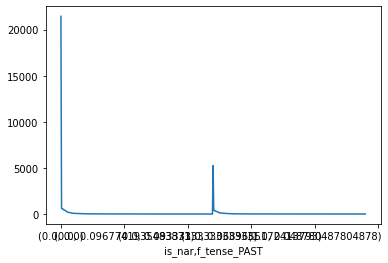

In [258]:
full_db.groupby(['is_nar'])['f_tense_PAST'].value_counts().plot()

In [243]:
with pd.option_context('display.max_colwidth', None):
    display(sent_label_db[sent_label_db['text'].str.contains('הקטנה')])

,file_idx,sent_idx,is_question,text,sent_idx_in_block,block_idx,is_nar,doc_idx,par_db_idx,par_idx_in_doc,par_pos_in_doc,par_type,block_type,nar_idx,sent_len,is_client,sent_idx_in_par,sent_pos_in_par,sent_pos_in_doc
89,1,89,0.000000,נשואות אממ כאילו שהקטנה היא גדולה ממני בשלוש שנים משהו כזה,1.000000,49.000000,0.000000,1.000000,47.000000,47.000000,0.234146,client,not_nar,0.000000,59.000000,1,1,0.400000,0.146819
120,1,120,0.000000,האחות הקטנה מבין שלושתן היא היא מגיעה בשבת בלילה היא גרה קרוב אלינו אז היא באה לאכול אצלנו,3.000000,60.000000,0.000000,1.000000,57.000000,57.000000,0.282927,client,not_nar,0.000000,90.000000,1,3,0.333333,0.197390
178,1,178,0.000000,רגע הקטנה זאת שגרה לידכם,0.000000,81.000000,0.000000,1.000000,76.000000,76.000000,0.375610,therapist,not_nar,0.000000,24.000000,0,0,1.000000,0.292007
13704,26,31,0.000000,נגיד לדוגמה יל יל הקטנה לא יל XXX הגדולה,0.000000,11.000000,1.000000,26.000000,6.000000,6.000000,0.060870,client,start,3.000000,42.000000,1,0,0.200000,0.070330
13705,26,32,0.000000,יל הקטנה קרה כמה פעמים כמעט 123 אחוז מהפעמים שאנחנו קובעים או שהיא מבטלת או שהיא,1.000000,11.000000,1.000000,26.000000,6.000000,6.000000,0.060870,client,start,3.000000,83.000000,1,1,0.400000,0.072527
14503,28,21,1.000000,זאת שעכשיו רבת איתה זאת יל הקטנה,0.000000,15.000000,1.000000,28.000000,14.000000,14.000000,0.089820,therapist,middle,1.000000,34.000000,0,0,1.000000,0.039711
14504,28,22,0.000000,לא הקטנה אנחנו לא מדברים השם משפחה שלה זה יל XXX אז אני קורא לה יל הקטנה כי אין לי סבלנות,0.000000,16.000000,1.000000,28.000000,15.000000,15.000000,0.095808,client,middle,1.000000,92.000000,1,0,1.000000,0.041516
14507,28,25,0.000000,יש שתי יל יל הקטנה ויל הגדולה,1.000000,18.000000,1.000000,28.000000,17.000000,17.000000,0.107784,client,middle,1.000000,29.000000,1,1,0.666667,0.046931
14970,28,488,0.000000,וזה גם עם יל הקטנה אותו דבר,7.000000,163.000000,0.000000,28.000000,149.000000,149.000000,0.898204,client,not_nar,0.000000,27.000000,1,7,0.727273,0.882671
17719,35,44,0.000000,שלחתי וואטסאפ כזה ליל הקטנה יל שאני לא מדבר איתה עם כל זה שהיא לא באה ליוםהולדת שלי והאיחורים הזמנים,0.000000,10.000000,1.000000,35.000000,5.000000,5.000000,0.095238,client,whole,3.000000,101.000000,1,37,0.436782,0.093555


In [7]:
with pd.option_context('display.max_colwidth', None):
    display(sent_label_db[sent_label_db['text'].str.contains(r'[0-9]')])

,doc_idx,sent_idx,text,is_nar,nar_idx,is_client
0,1,0,אז היום אנחנו נפגשים פה ב 123 אבל שבוע הבא בחמישי,0.000000,0.000000,0
38,1,38,אנחנו הצוות שלי שהוא אנחנו 123 אנשים אז אנחנו עוברים ליחסית מקום מבודד מכל השאר,1.000000,1.000000,1
65,1,65,אממ ההורים שלי הם כבר כאילו אבא שלי כבר קרוב לפנסיה יחסית כבר 123 ומשו הוא עובד בנק כבר 123 שנה,0.000000,0.000000,1
81,1,81,אמא שלי היא ילידת ארגנטינה עלתה לארץ בגיל 123 כזה,0.000000,0.000000,1
92,1,92,בהפרש יחסית יותר גדול 123 שנים הפרש,1.000000,2.000000,1
...,...,...,...,...,...,...
38230,79,238,אבל אני מאוד מבין את התחושה הזאתי של השבריריות ש אם זה מאיים זאת אומרת החוויה שחווית בעבר גם אם זה היה לפני 123 או משהו שנה החוויה היא נורא קשה ועוצמתית ואני מאוד מאוד מבין את זה,0.000000,0.000000,0
38249,79,257,ואני באמת חושב שב נשארו לנו עוד 123 פגישות אני באמת חושב שזה יהיה טוב אם ננסה ככה תביא את הנושאים תחשוב על נושאים שאתה רוצה שנסדר אותם,0.000000,0.000000,0
38314,80,63,יהיה גם חלק שהוא קצת יותר פתוח קצת יותר דומה למה שאנחנו עושים כאן עכשיו אז ככה שזה לא יהיה איזה שינוי של 123 מעלות,0.000000,0.000000,0
38389,80,138,כי באמת בסופו של דבר הטיפול הוא פגישה של אה שעה או לפעמים שעתיים בשבוע אה כשיש שבעה ימים ו 123 שעות בכל יום,0.000000,0.000000,0


In [137]:
sent_lemma_db=pd.merge(sent_label_db,sent_pos_db,left_on=['doc_idx','sent_idx'],right_on=['doc_idx','sent_idx'],validate='one_to_many',how='outer')

In [79]:
sent_lemma_db

,file_idx,sent_idx,is_question,text,sent_idx_in_block,block_idx,is_nar,doc_idx,par_db_idx,par_idx_in_doc,...,nar_idx,sent_len,is_client,sent_idx_in_par,sent_pos_in_par,sent_pos_in_doc,db_idx,FORM,LEMMA,POSTAG
0,1,0,0.000000,אז היום אנחנו נפגשים פה ב 123 אבל שבוע הבא בח...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,50.000000,0,0,1.000000,0.001631,0,אז,אז,RB
1,1,0,0.000000,אז היום אנחנו נפגשים פה ב 123 אבל שבוע הבא בח...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,50.000000,0,0,1.000000,0.001631,1,היום,היום,RB
2,1,0,0.000000,אז היום אנחנו נפגשים פה ב 123 אבל שבוע הבא בח...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,50.000000,0,0,1.000000,0.001631,2,אנחנו,הוא,PRP
3,1,0,0.000000,אז היום אנחנו נפגשים פה ב 123 אבל שבוע הבא בח...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,50.000000,0,0,1.000000,0.001631,3,נפגשים,נפגש,BN
4,1,0,0.000000,אז היום אנחנו נפגשים פה ב 123 אבל שבוע הבא בח...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,50.000000,0,0,1.000000,0.001631,4,פה,פה,NNP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561539,80,529,0.000000,היה לי מאוד קשה,0.000000,232.000000,0.000000,80.000000,224.000000,224.000000,...,0.000000,15.000000,1,0,1.000000,1.000000,5827,היה,היה,COP
561540,80,529,0.000000,היה לי מאוד קשה,0.000000,232.000000,0.000000,80.000000,224.000000,224.000000,...,0.000000,15.000000,1,0,1.000000,1.000000,5828,ל,ל,IN
561541,80,529,0.000000,היה לי מאוד קשה,0.000000,232.000000,0.000000,80.000000,224.000000,224.000000,...,0.000000,15.000000,1,0,1.000000,1.000000,5829,אני,אני,S_PRN
561542,80,529,0.000000,היה לי מאוד קשה,0.000000,232.000000,0.000000,80.000000,224.000000,224.000000,...,0.000000,15.000000,1,0,1.000000,1.000000,5830,מאוד,מאוד,RB


## Retrieve example of narrartive sentence

In [308]:
sent_lemma_db.query('is_nar == 1').groupby(['doc_idx','nar_idx'])['text'].aggregate(''.join())

TypeError: join() takes exactly one argument (0 given)

### Detect most common lemmas for nar/not nar

In [80]:
sent_pos_db =  common_utils.concat_dbs(dir_name,"sent_pos_db",['LEMMA','FORM','sent_idx','POSTAG'],'db_idx')


In [91]:
lemma_count={}
lemma_count['nar']=pd.DataFrame(sent_lemma_db.query('is_nar == 1')['LEMMA'].value_counts())
lemma_count['not_nar']=pd.DataFrame(sent_lemma_db.query('is_nar == 0')['LEMMA'].value_counts())

In [95]:
most_common={}
most_common[100]={}
for i in [100,150]:
    most_common[i]={}
    for key in lemma_count.keys():
        most_common[i][key]={}
        most_common[i][key]['all']=set(lemma_count[key].index.tolist()[:i])
most_common
for i in [100,150]:
    for key in lemma_count.keys():
        another_key = 'not_nar' if key == 'nar' else 'nar'     
        most_common[i][key]['unique']=most_common[i][key]['all']-most_common[i][another_key]['all']


In [96]:
for i in [100,150]:
    for key in lemma_count.keys():
        print("{} : {}".format(i, most_common[i][key]['unique']))

100 : {'חבר', 'אחרי', 'בית', 'שבוע', 'לפני', 'התחיל', 'שנה', 'עבר', 'זכר', 'אצל', 'אמא', 'יצא'}
100 : {'היות', 'אפשר', 'נכון', 'פה', 'למה', 'אמ', 'נראה', 'אמת', 'סדר', 'צד', 'עניין', 'אדם'}
150 : {'פתאום', 'בגלל', 'אתמול', 'די', 'קטע', 'שעה', 'התחלה', 'הכיר', 'אח', 'אחת', 'הילך', 'ילד', 'סיפר', 'אף', 'לפני', 'בכלל', 'זכר', 'זהו', 'אמא', 'חישב'}
150 : {'אממ', 'רגע', 'פחות', 'אפשר', 'מצב', 'נתן', 'אוקיי', 'הסתכל', 'חיים', 'בין', 'בחינה', 'שאת', 'בעצם', 'קודם', 'קיבל', 'ממ', 'לפעמים', 'הראה', 'ברור', 'תחושה'}


In [99]:
total_unique = most_common[100]['nar']['all'].symmetric_difference(most_common[100]['not_nar']['all'])

In [100]:
total_unique

{'אדם',
 'אחרי',
 'אמ',
 'אמא',
 'אמת',
 'אפשר',
 'אצל',
 'בית',
 'היות',
 'התחיל',
 'זכר',
 'חבר',
 'יצא',
 'למה',
 'לפני',
 'נכון',
 'נראה',
 'סדר',
 'עבר',
 'עניין',
 'פה',
 'צד',
 'שבוע',
 'שנה'}

In [103]:
total_stop= most_common[100]['nar']['all'].union(most_common[100]['not_nar']['all']) - total_unique

In [104]:
total_stop

{'XXX',
 '_',
 'אבל',
 'אה',
 'או',
 'אולי',
 'אז',
 'אחד',
 'אחר',
 'איזה',
 'איך',
 'איל',
 'אין',
 'איש',
 'אל',
 'אלה',
 'אם',
 'אמר',
 'אני',
 'את',
 'אתה',
 'ב',
 'בא',
 'באמת',
 'גם',
 'דבר',
 'דיבר',
 'ה',
 'הבין',
 'הגיד',
 'הגיע',
 'הוא',
 'היא',
 'היה',
 'הלך',
 'הם',
 'הרבה',
 'הרגיש',
 'ו',
 'זאת',
 'זה',
 'זמן',
 'חשב',
 'טוב',
 'ידע',
 'יום',
 'יותר',
 'יכול',
 'יש',
 'כ',
 'כאילו',
 'כבר',
 'כול',
 'כי',
 'כך',
 'ככה',
 'כמה',
 'כמו',
 'כן',
 'כש',
 'ל',
 'לא',
 'לקח',
 'מ',
 'מאוד',
 'מה',
 'מישהו',
 'ממש',
 'מקום',
 'משהו',
 'עבודה',
 'עוד',
 'עכשיו',
 'על',
 'עם',
 'עצמו',
 'עשה',
 'פעם',
 'צריך',
 'קצת',
 'קשה',
 'ראה',
 'רצה',
 'רק',
 'ש',
 'של',
 'שם',
 'שני'}

In [105]:
len(total_stop)

88

### Save stop-lists without unique words

In [109]:
import json
json_path = os.path.join(os.getcwd(),defines.PATH_TO_DFS,dir_name,"lemma_stop_non.unique.json")
with open(json_path, 'w') as fp:
    json.dump(list(total_stop),fp,ensure_ascii=False)

### Find counter per stop lemmas

In [145]:
stop_l_counter=pd.DataFrame(sent_lemma_db.query('LEMMA in @total_stop')['LEMMA'].value_counts())
stop_l_counter

,LEMMA
ה,39674
הוא,36920
זה,25230
ש,24894
ל,19140
...,...
הבין,772
איל,721
לקח,712
מישהו,706


In [147]:
common_utils.save_db(stop_l_counter, dir_name, "stop_lemma_counter", keep_index=True)

Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/stop_lemma_counter.csv,  index True


### Find counter per unique lemma 

In [163]:
unique_l_counter_nar=pd.DataFrame()
unique_l_counter_nar['nar']=sent_lemma_db.query("LEMMA in  @most_common[100]['nar']['unique']")['LEMMA'].value_counts()
unique_l_counter_not_nar=pd.DataFrame()
unique_l_counter_not_nar['not_nar']=sent_lemma_db.query("LEMMA in  @most_common[100]['not_nar']['unique']")['LEMMA'].value_counts()

In [164]:
unique_l_counter_nar

,nar
בית,684
שנה,662
עבר,661
אחרי,637
חבר,598
שבוע,597
יצא,541
התחיל,534
אצל,492
אמא,466


In [165]:
db_name="lemma_unique_nar"
print(db_name)
common_utils.save_db(unique_l_counter_nar, dir_name, db_name, keep_index=True)

lemma_unique_nar
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/lemma_unique_nar.csv,  index True


In [166]:
db_name="lemma_unique_not_nar"
print(db_name)
common_utils.save_db(unique_l_counter_not_nar, dir_name, db_name, keep_index=True)

lemma_unique_not_nar
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/lemma_unique_not_nar.csv,  index True


### Find unque words same as lemmas

In [138]:
sent_label_db = common_utils.concat_dbs(dir_name,"sent_db")

In [139]:
sent_label_db

,file_idx,sent_idx,is_question,text,sent_idx_in_block,block_idx,is_nar,doc_idx,par_db_idx,par_idx_in_doc,par_pos_in_doc,par_type,block_type,nar_idx,sent_len,is_client,sent_idx_in_par,sent_pos_in_par,sent_pos_in_doc
0,1,0,0.000000,אז היום אנחנו נפגשים פה ב 123 אבל שבוע הבא בח...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.004878,therapist,not_nar,0.000000,50.000000,0,0,1.000000,0.001631
1,1,1,0.000000,כן,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.009756,client,not_nar,0.000000,2.000000,1,0,1.000000,0.003263
2,1,2,1.000000,אוקיי מה שלומך,0.000000,2.000000,0.000000,1.000000,2.000000,2.000000,0.014634,therapist,not_nar,0.000000,16.000000,0,0,1.000000,0.004894
3,1,3,0.000000,ברוך השם,0.000000,3.000000,0.000000,1.000000,3.000000,3.000000,0.019512,client,not_nar,0.000000,8.000000,1,0,1.000000,0.006525
4,1,4,0.000000,מחר יש לכם יום טיול,0.000000,4.000000,0.000000,1.000000,4.000000,4.000000,0.024390,therapist,not_nar,0.000000,19.000000,0,0,1.000000,0.008157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38429,80,525,0.000000,שאני מרגיש בהם לא נוח,3.000000,230.000000,0.000000,80.000000,222.000000,222.000000,0.991111,client,not_nar,0.000000,21.000000,1,3,0.666667,0.992453
38430,80,526,0.000000,אז כאילו למה למה אני מתגעגע,4.000000,230.000000,0.000000,80.000000,222.000000,222.000000,0.991111,client,not_nar,0.000000,27.000000,1,4,0.833333,0.994340
38431,80,527,0.000000,או למה אני למה אני רוצה,5.000000,230.000000,0.000000,80.000000,222.000000,222.000000,0.991111,client,not_nar,0.000000,23.000000,1,5,1.000000,0.996226
38432,80,528,1.000000,והצלחת לענות לעצמך,0.000000,231.000000,0.000000,80.000000,223.000000,223.000000,0.995556,therapist,not_nar,0.000000,19.000000,0,0,1.000000,0.998113


In [140]:
sent_label_db['text'].str.split(expand=True)#apply(lambda x: x.split())

,0,1,2,3,4,5,6,7,8,9,...,311,312,313,314,315,316,317,318,319,320
0,אז,היום,אנחנו,נפגשים,פה,ב,123,אבל,שבוע,הבא,...,None,None,None,None,None,None,None,None,None,None
1,כן,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,אוקיי,מה,שלומך,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,ברוך,השם,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,מחר,יש,לכם,יום,טיול,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38429,שאני,מרגיש,בהם,לא,נוח,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
38430,אז,כאילו,למה,למה,אני,מתגעגע,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
38431,או,למה,אני,למה,אני,רוצה,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
38432,והצלחת,לענות,לעצמך,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [141]:
word_db=pd.DataFrame((sent_label_db.set_index(['sent_idx','is_nar']))['text'].apply(lambda x: x.split()).explode()).reset_index()

In [142]:
word_db

,sent_idx,is_nar,text
0,0,0.000000,אז
1,0,0.000000,היום
2,0,0.000000,אנחנו
3,0,0.000000,נפגשים
4,0,0.000000,פה
...,...,...,...
421607,528,0.000000,לעצמך
421608,529,0.000000,היה
421609,529,0.000000,לי
421610,529,0.000000,מאוד


In [143]:
word_db[word_db['text']=='ישיבה'].groupby('is_nar')['text'].value_counts()

is_nar    text 
0.000000  ישיבה     8
1.000000  ישיבה    15
Name: text, dtype: int64

In [144]:
word_count={}
word_count['nar']=pd.DataFrame(word_db.query('is_nar == 1')['text'].value_counts())
word_count['not_nar']=pd.DataFrame(word_db.query('is_nar == 0')['text'].value_counts())

In [145]:
most_common_w={}
most_common_w[100]={}
for i in [100,150]:
    most_common_w[i]={}
    for key in word_count.keys():
        most_common_w[i][key]={}
        most_common_w[i][key]['all']=set(word_count[key].index.tolist()[:i])

for i in [100,150]:
    for key in word_count.keys():
        another_key = 'not_nar' if key == 'nar' else 'nar'     
        most_common_w[i][key]['unique']=most_common_w[i][key]['all']-most_common_w[i][another_key]['all']

In [146]:
for i in [100,150]:
    for key in word_count.keys():
        print("{} : {}".format(i, most_common_w[i][key]['unique']))

100 : {'אמרתי', 'ולא', 'יום', 'אחרי', 'אמר', 'לה', 'שלא', 'לפני', 'הייתה', 'הם', 'היום', 'היו', 'אמרה', 'פשוט', 'שלו'}
100 : {'האלה', 'נכון', 'חושבת', 'בעצם', 'אנחנו', 'מרגיש', 'שיש', 'שלך', 'הזאת', 'כמו', 'פה', 'אמ', 'שאת', 'שאתה', 'אותך'}
150 : {'פתאום', 'איתה', 'זוכר', 'לפני', 'אחרי', 'הרגשתי', 'בבית', 'אמרה', 'שנים', 'איתי', 'שלו', 'וכאילו', 'אחת', 'והיא', 'שלה', 'והוא', 'אמר', 'אמא', 'אותה', 'היו', 'לדבר', 'איתו'}
150 : {'במקום', 'הדברים', 'לפעמים', 'שני', 'ברור', 'אממ', 'איזשהו', 'עצמי', 'שאת', 'צריכה', 'אוקיי', 'פעמים', 'יכולה', 'מצד', 'זמן', 'חושבת', 'אפשר', 'פחות', 'יהיה', 'תמיד', 'בדיוק', 'שהם'}


In [147]:
total_unique_w = most_common_w[100]['nar']['all'].symmetric_difference(most_common_w[100]['not_nar']['all'])
total_stop_w = most_common_w[100]['nar']['all'].union(most_common_w[100]['not_nar']['all']) - total_unique_w

In [148]:
total_unique_w

{'אותך',
 'אחרי',
 'אמ',
 'אמר',
 'אמרה',
 'אמרתי',
 'אנחנו',
 'בעצם',
 'האלה',
 'הזאת',
 'היו',
 'היום',
 'הייתה',
 'הם',
 'ולא',
 'חושבת',
 'יום',
 'כמו',
 'לה',
 'לפני',
 'מרגיש',
 'נכון',
 'פה',
 'פשוט',
 'שאת',
 'שאתה',
 'שיש',
 'שלא',
 'שלו',
 'שלך'}

In [149]:
total_stop_w

{'123',
 'XXX',
 'אבל',
 'אה',
 'או',
 'אולי',
 'אומר',
 'אומרת',
 'אותו',
 'אותי',
 'אז',
 'אחד',
 'איזה',
 'איך',
 'אין',
 'אם',
 'אני',
 'אנשים',
 'את',
 'אתה',
 'ב',
 'באמת',
 'בסדר',
 'גם',
 'דברים',
 'ה',
 'הוא',
 'הזה',
 'הזמן',
 'היא',
 'היה',
 'הייתי',
 'הרבה',
 'ו',
 'ואז',
 'ואני',
 'וזה',
 'זאת',
 'זה',
 'חושב',
 'טוב',
 'יודע',
 'יודעת',
 'יותר',
 'יכול',
 'יש',
 'כאילו',
 'כבר',
 'כזה',
 'כי',
 'כך',
 'ככה',
 'כל',
 'כמה',
 'כן',
 'לא',
 'להיות',
 'לו',
 'לי',
 'לך',
 'למה',
 'לעשות',
 'מאוד',
 'מה',
 'ממש',
 'משהו',
 'נגיד',
 'עוד',
 'עושה',
 'עכשיו',
 'על',
 'עם',
 'פעם',
 'צריך',
 'קצת',
 'קשה',
 'רוצה',
 'ש',
 'שאני',
 'שהוא',
 'שהיא',
 'שזה',
 'של',
 'שלי',
 'שם'}

### Save stop word list without unique words

In [150]:
import json
json_path = os.path.join(os.getcwd(),defines.PATH_TO_DFS,dir_name,"word_stop_non.unique.json")
with open(json_path, 'w') as fp:
    json.dump(list(total_stop_w),fp,ensure_ascii=False)

### Find counter per unique stop words

In [151]:
unique_w_counter_nar=pd.DataFrame()
unique_w_counter_nar['nar']=word_db.query("text in  @most_common_w[100]['nar']['unique']")['text'].value_counts()
unique_w_counter_not_nar=pd.DataFrame()
unique_w_counter_not_nar['not_nar']=word_db.query("text in  @most_common_w[100]['not_nar']['unique']")['text'].value_counts()

In [152]:
db_name="word_unique_nar"
print(db_name)
common_utils.save_db(unique_w_counterc_nar, dir_name, db_name, keep_index=True)

word_unique_nar


NameError: name 'unique_w_counterc_nar' is not defined

In [153]:
db_name="word_unique_not_nar"
print(db_name)
common_utils.save_db(unique_w_counter_not_nar, dir_name, db_name, keep_index=True)

word_unique_not_nar
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/word_unique_not_nar.csv, 
index True
float_format %.5f


In [154]:
nar_count.index.tolist()[:100]

NameError: name 'nar_count' is not defined

In [155]:
stop_w_counter=pd.DataFrame(word_db.query('text in @total_stop_w')['text'].value_counts())
stop_w_counter

,text
זה,16237
לא,14987
אני,12416
את,9254
כאילו,8606
...,...
ב,792
עושה,763
קשה,729
כמה,713


In [156]:
common_utils.save_db(stop_w_counter, dir_name, "stop_word_counter", keep_index=True)

Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/stop_word_counter.csv, 
index True
float_format %.5f


In [157]:
count_db=pd.DataFrame(sent_lemma_db['LEMMA'].value_counts())

In [158]:
count_db.reset_index(inplace=True)

In [159]:
count_db.rename({'LEMMA':'counter'},axis=1,inplace=True)

In [160]:
count_db.rename({'index':'LEMMA'},axis=1,inplace=True)

In [161]:
count_db.describe()

,counter
count,9817.000000
mean,56.424264
std,800.217478
min,1.000000
25%,1.000000
50%,2.000000
75%,8.000000
max,39159.000000


In [162]:
count_db

,LEMMA,counter
0,ה,39159
1,הוא,36477
2,זה,24908
3,ש,24461
4,ל,18925
...,...,...
9812,קשה,1
9813,הקדשה,1
9814,איתההיא,1
9815,תקופתי,1


<AxesSubplot:>

<Figure size 2160x2160 with 0 Axes>

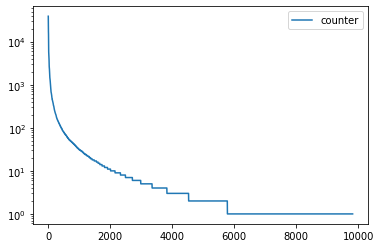

In [163]:
plt.figure(figsize = (30,30))
count_db.plot(logy=True)

In [164]:
count_db[100:120]

,LEMMA,counter
100,אחרי,631
101,עניין,611
102,חבר,604
103,למה,602
104,אפשר,597
105,קרה,596
106,שבוע,591
107,תמיד,576
108,אדם,571
109,פשוט,570


In [165]:
most_common_lemma=count_db['LEMMA'].tolist()
# most_common_lemma

In [166]:
from wordcloud import WordCloud
font_path="./external_src/OpenSans-VariableFont_wdth,wght.ttf"
word_cloud = WordCloud(
    font_path=font_path,
    collocations = False,
    background_color = 'white',
    max_words=200,
    stopwords=most_common_lemma[:100],
    max_font_size=100)

In [167]:
plt.figure(figsize = (30,30))
text = ' '.join(sent_lemma_db['LEMMA'])
word_cloud.generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Entire corpus",fontsize=50)
plt.show()

TypeError: sequence item 613: expected str instance, float found

<Figure size 2160x2160 with 0 Axes>

In [168]:
sent_lemma_db.query("is_nar == 1")['LEMMA']

161        הוא
162      עכשיו
163          ב
164          ה
165        חבר
         ...  
73134      NaN
73135      NaN
73136      NaN
73137      NaN
73138      NaN
Name: LEMMA, Length: 24865, dtype: object

In [169]:
plt.figure(figsize = (30,30))
text_nar = ' '.join(sent_lemma_db.query("is_nar == 1")['LEMMA'])
word_cloud.generate(text_nar)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Narrative",fontsize=50)
plt.show()

TypeError: sequence item 452: expected str instance, float found

<Figure size 2160x2160 with 0 Axes>

In [170]:
most_common = count_db[:100]['LEMMA'].tolist()

In [171]:
nar_lemma_count = pd.DataFrame(sent_lemma_db.query('LEMMA.isin(@most_common) and is_nar ==1')['LEMMA'].value_counts())
nar_lemma_count

,LEMMA
ה,1230
הוא,996
זה,670
ל,584
ש,565
...,...
היות,14
הם,13
צד,12
נכון,11


In [172]:
not_nar_lemma_count=pd.DataFrame(sent_lemma_db.query('LEMMA.isin(@most_common) and is_nar ==0')['LEMMA'].value_counts())
not_nar_lemma_count

,LEMMA
ה,1695
הוא,1153
זה,1107
ש,938
ב,755
...,...
כמה,24
כמו,19
אל,17
בית,15


In [173]:
most_common_db=pd.merge(not_nar_lemma_count,nar_lemma_count,left_index=True, right_index=True,validate='one_to_one',suffixes=['not_nar','is_nar'])
most_common_db

,LEMMAnot_nar,LEMMAis_nar
ה,1695,1230
הוא,1153,996
זה,1107,670
ש,938,565
ב,755,559
...,...,...
כמה,24,27
כמו,19,14
אל,17,31
בית,15,22


<AxesSubplot:>

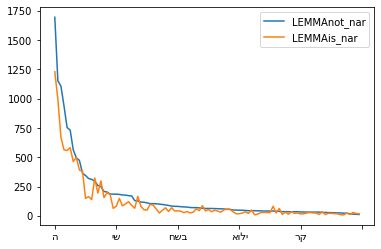

In [174]:
most_common_db.plot()

<AxesSubplot:>

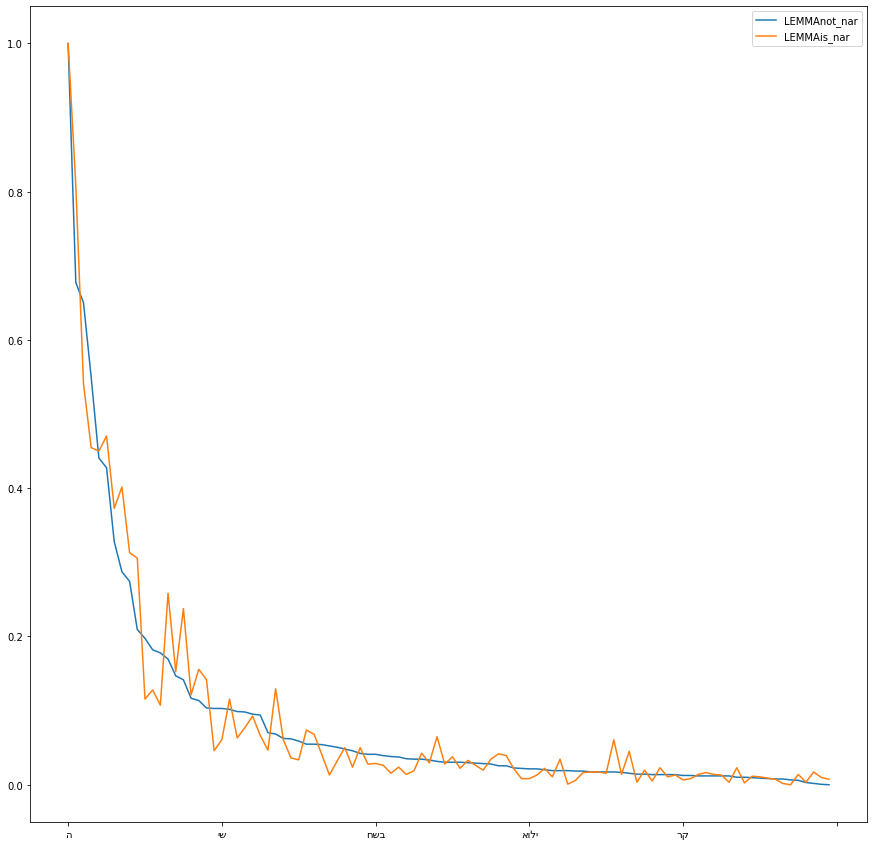

In [175]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# fig,ax=plt.subplots(figsize=(15,15))
x_t=np.arange(0,len(most_common_db.index)+1,5)
x_scaled = pd.DataFrame(MinMaxScaler().fit_transform(most_common_db),columns=most_common_db.columns,index=most_common_db.index)
x_scaled.plot(figsize=(15,15))#,xticks=x_t)#ax=ax)

In [176]:
sent_lemma_db.query("is_nar == 0")['LEMMA'].value_counts()

ה         1695
הוא       1153
זה        1107
ש          938
ב          755
          ... 
טחן          1
ליל          1
צר           1
מזג          1
מוכוון       1
Name: LEMMA, Length: 1869, dtype: int64

In [177]:
plt.figure(figsize = (30,30))
text_nar = ' '.join(sent_lemma_db.query("is_nar == 0")['LEMMA'])
word_cloud.generate(text_nar)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Not narrative",fontsize=50)
plt.show()

TypeError: sequence item 161: expected str instance, float found

<Figure size 2160x2160 with 0 Axes>

## Save stop_lemmas

In [178]:
dir_name

'duplicate'

In [179]:
import json
json_path = os.path.join(os.getcwd(),defines.PATH_TO_DFS,dir_name,"my_stop_lemmas.json")
with open(json_path, 'w') as fp:
    json.dump(most_common_lemma,fp,ensure_ascii=False)

# Check most common WORDS

In [180]:
def get_words_from_db(db):
    return flatten(db['text'].str.split().tolist())

In [181]:
word_db=pd.DataFrame(get_words_from_db(sent_label_db),columns=['text'])
word_db

,text
0,אז
1,היום
2,אנחנו
3,נפגשים
4,פה
...,...
421607,לעצמך
421608,היה
421609,לי
421610,מאוד


In [182]:
word_count_db[word_count_db['index'].str.contains(r'[a-z,A-Z]{1,}[א-ת]{1,}')]

NameError: name 'word_count_db' is not defined

In [183]:
word_count_db= pd.DataFrame(word_db['text'].value_counts())
word_count_db.reset_index(inplace=True)
word_count_db

,index,text
0,זה,16237
1,לא,14987
2,אני,12416
3,את,9254
4,כאילו,8606
...,...,...
26255,מעטות,1
26256,והתממשו,1
26257,מפותחת,1
26258,ושכלתנית,1


In [184]:
word_count_db.rename({'text':'counter'},axis=1,inplace=True)
word_count_db.rename({'index':'word'},axis=1,inplace=True)

In [185]:
word_count_db

,word,counter
0,זה,16237
1,לא,14987
2,אני,12416
3,את,9254
4,כאילו,8606
...,...,...
26255,מעטות,1
26256,והתממשו,1
26257,מפותחת,1
26258,ושכלתנית,1


In [186]:
word_count_db[100:120]

,word,counter
100,אמ,646
101,רק,627
102,לה,626
103,פשוט,626
104,היום,621
105,הזאת,620
106,ולא,617
107,האלה,602
108,וגם,599
109,דבר,594


In [187]:
most_comomn_words = word_count_db['word'].tolist()

In [188]:
# most_comomn_words

## Save stop_words

In [189]:
import json
json_path = os.path.join(os.getcwd(),defines.PATH_TO_DFS,dir_name,"my_stop_words.json")
with open(json_path, 'w') as fp:
    json.dump(most_comomn_words,fp,ensure_ascii=False)

In [190]:
from wordcloud import WordCloud
font_path="./external_src/OpenSans-VariableFont_wdth,wght.ttf"
word_cloud = WordCloud(
    font_path=font_path,
    collocations = False,
    background_color = 'white',
    max_words=200,
    stopwords=most_comomn_words[:100],
    max_font_size=100)

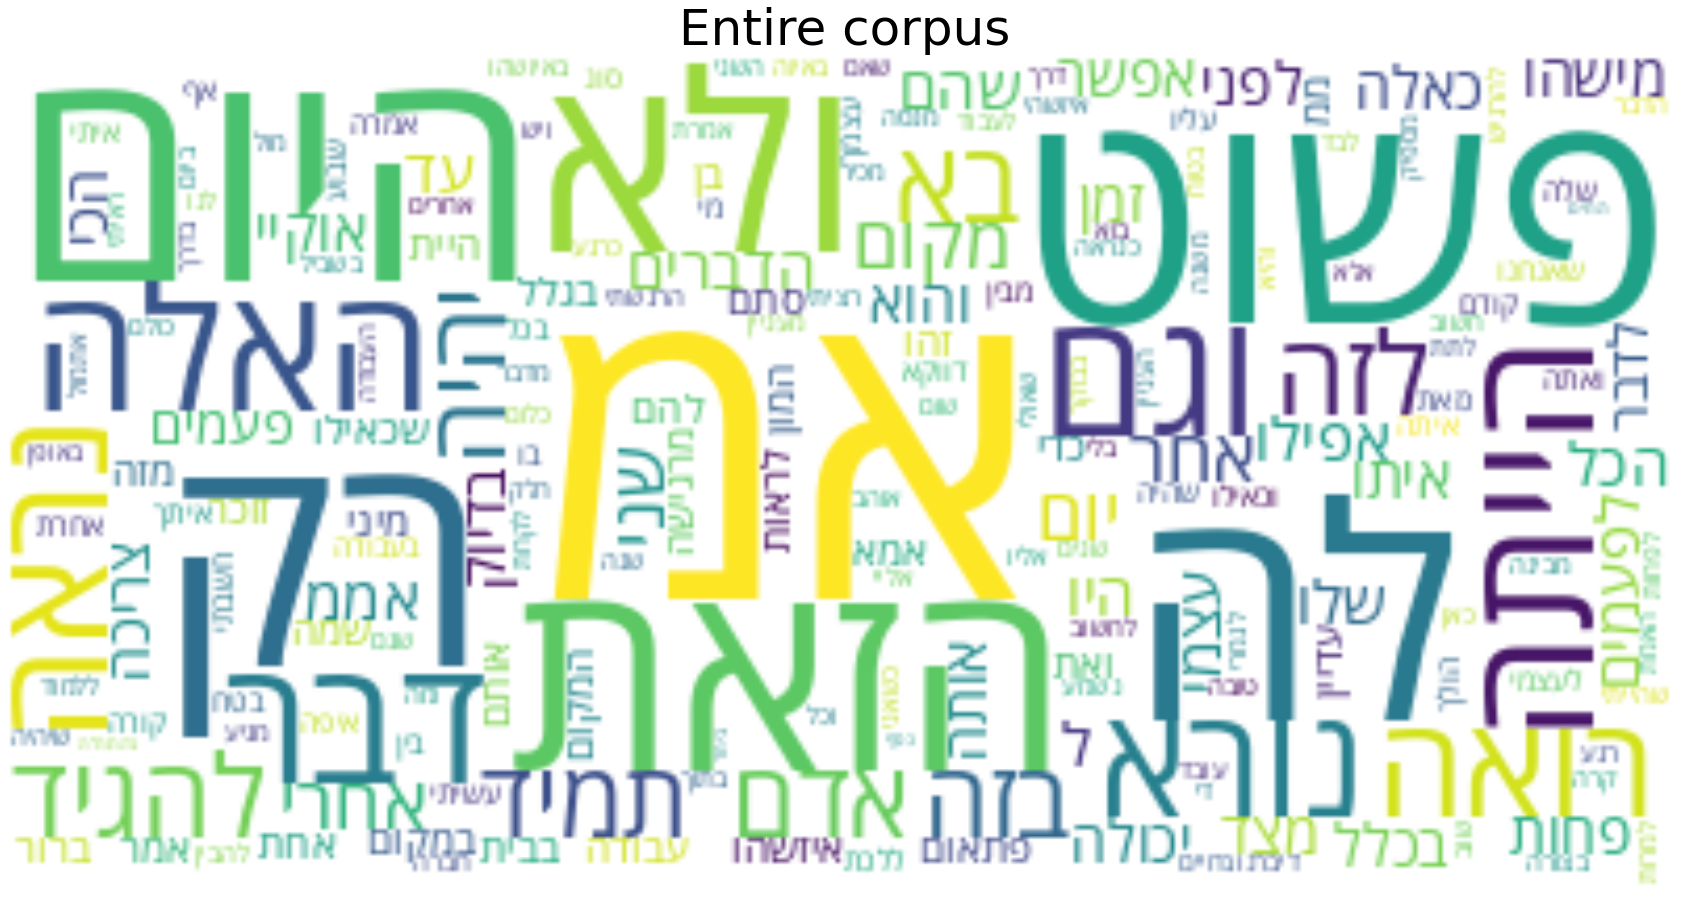

In [191]:
plt.figure(figsize = (30,30))
word_cloud.generate(' '.join(get_words_from_db(sent_label_db)))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Entire corpus",fontsize=50)
plt.show()

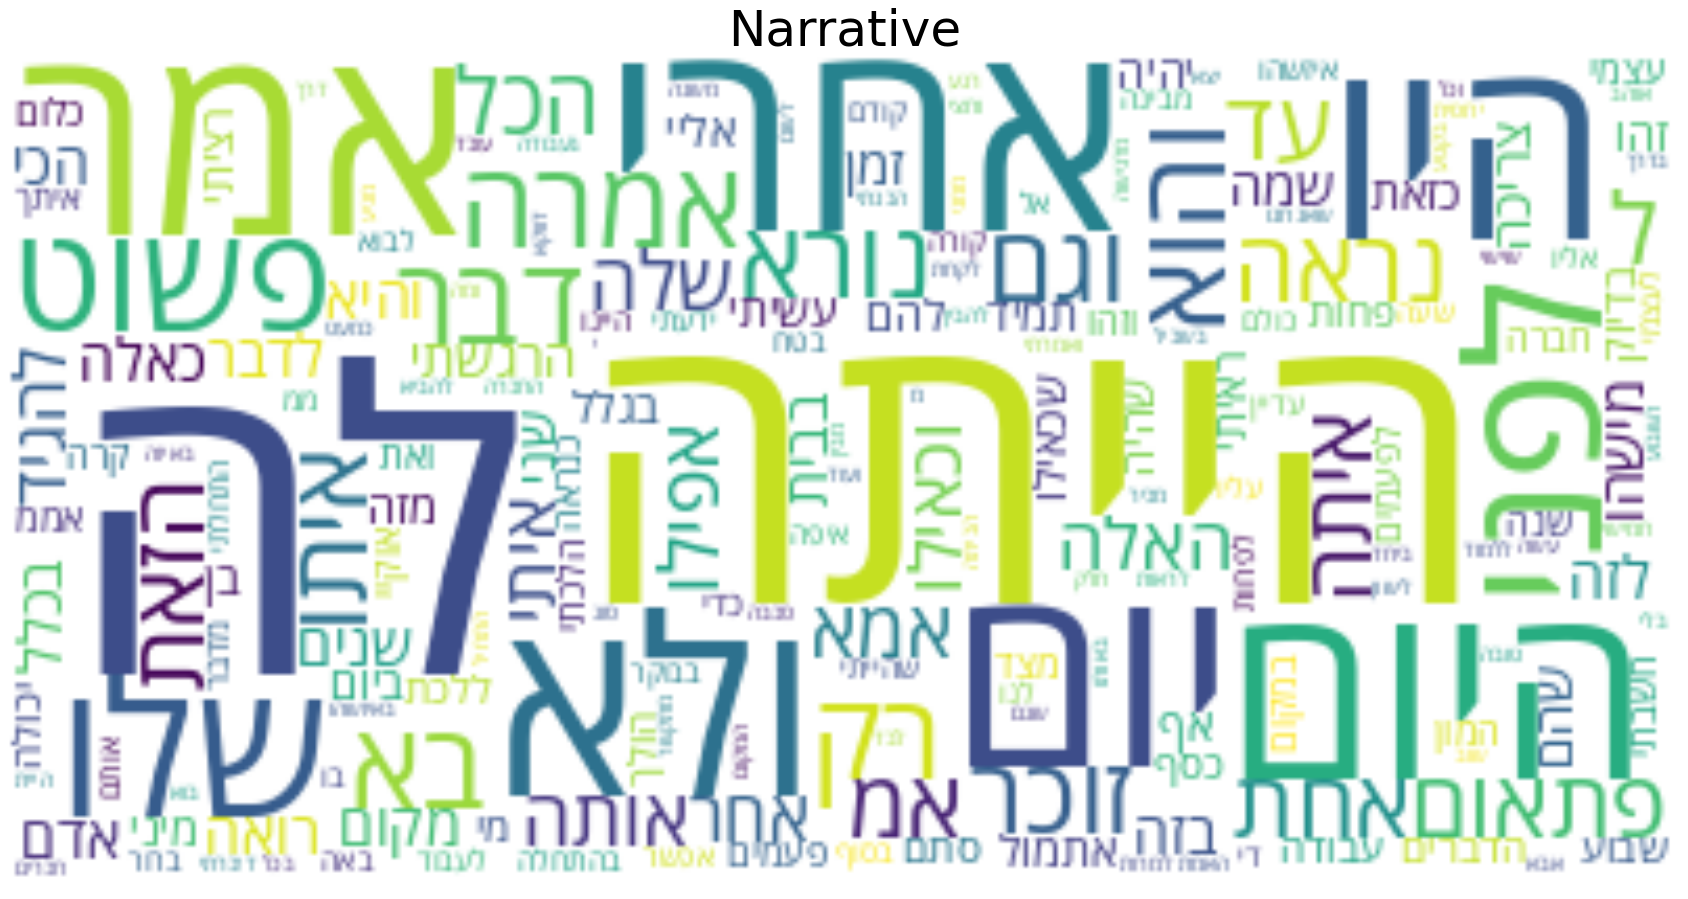

In [192]:
plt.figure(figsize = (30,30))
word_cloud.generate(' '.join(get_words_from_db(sent_label_db.query("is_nar == 1"))))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Narrative",fontsize=50)
plt.show()

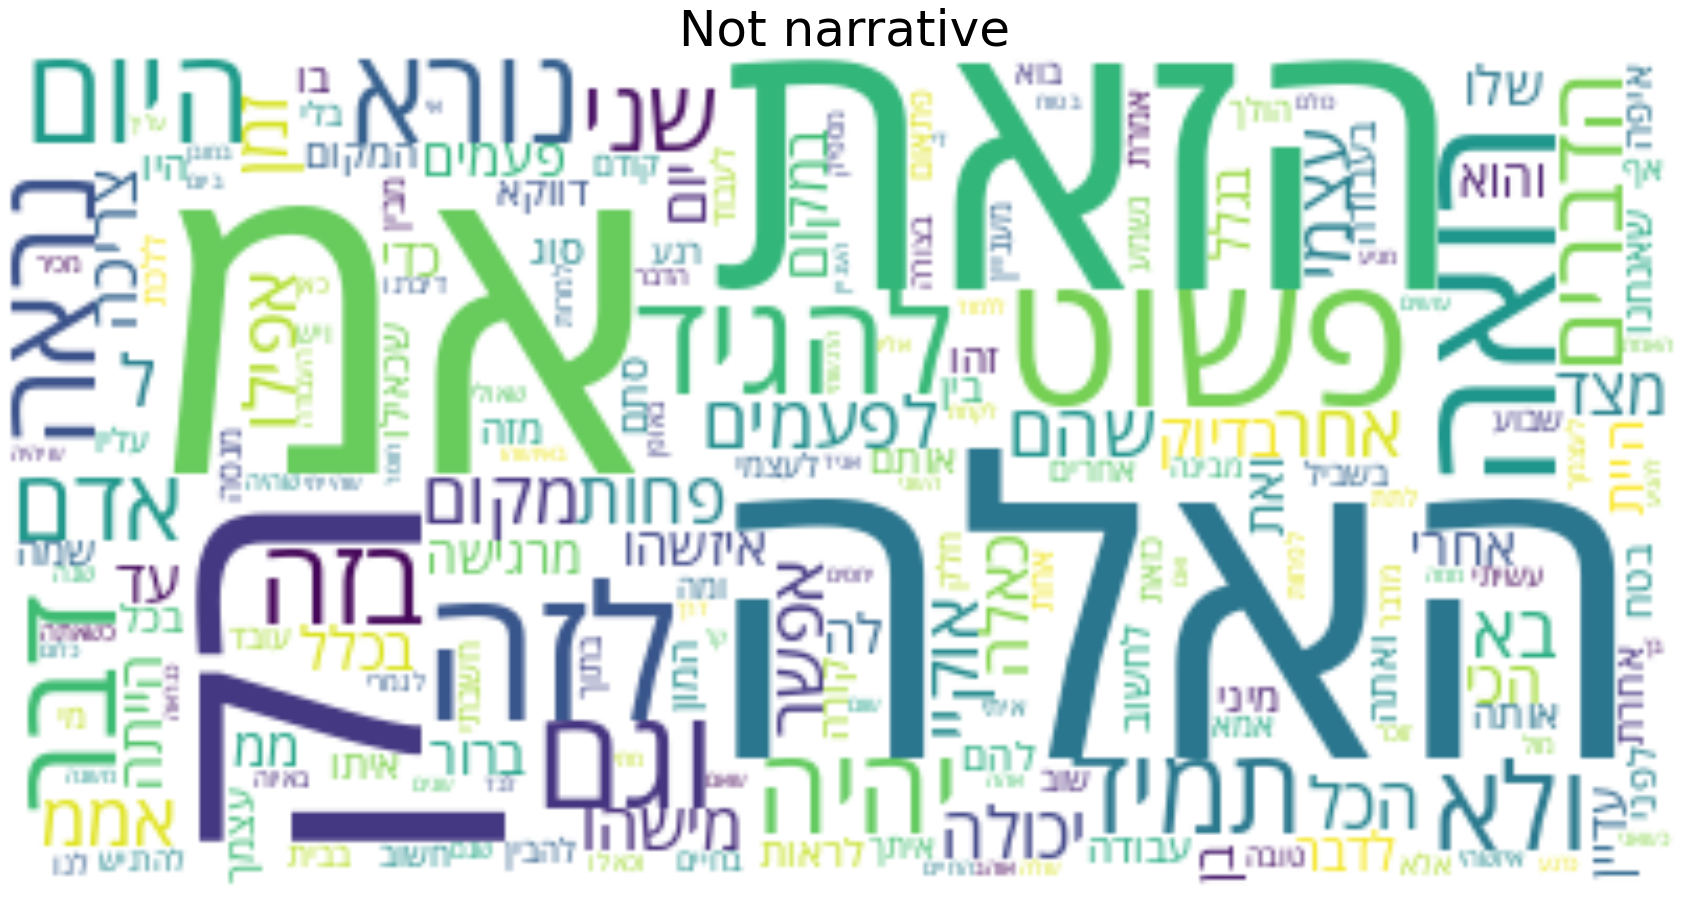

In [193]:
plt.figure(figsize = (30,30))
word_cloud.generate(' '.join(get_words_from_db(sent_label_db.query("is_nar == 0"))))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Not narrative",fontsize=50)
plt.show()

In [53]:
merged_db = common_utils.concat_dbs(dir_name,"merged_db")
merged_db.head()

,doc_idx,merged_idx,is_question,is_nar,par_idx_in_doc,par_pos_in_doc,sent_len,is_client,sent_idx_in_par,sent_pos_in_par,...,f_per_2,f_per_3,f_per_A,f_tense_BEINONI,f_tense_FUTURE,f_tense_IMPERATIVE,f_tense_PAST,POSTAG_NEG,POSTAG_yyCM,POSTAG_TTL
0,1,0,0.000000,0.000000,0.000000,0.004878,50.000000,0,0,1.000000,...,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
1,1,1,0.000000,0.000000,1.000000,0.009756,2.000000,1,0,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
2,1,2,1.000000,0.000000,2.000000,0.014634,16.000000,0,0,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
3,1,3,0.000000,0.000000,3.000000,0.019512,8.000000,1,0,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
4,1,4,0.000000,0.000000,4.000000,0.024390,19.000000,0,0,1.000000,...,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN


<Figure size 1080x576 with 0 Axes>

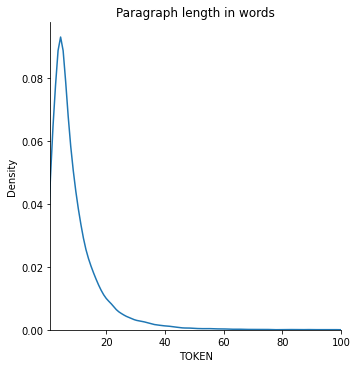

In [195]:
plt.figure(figsize = (15,8))
par_len_words = merged_db.groupby(['doc_idx','merged_idx','par_idx_in_doc'])
par_len_sns =  sns.displot(data=merged_db,
                            x='TOKEN',
                            kind='kde',
                            common_norm=False
                           )
par_len_sns.set(title="Paragraph length in words",xlim=((1,100)))

<Figure size 576x1080 with 0 Axes>

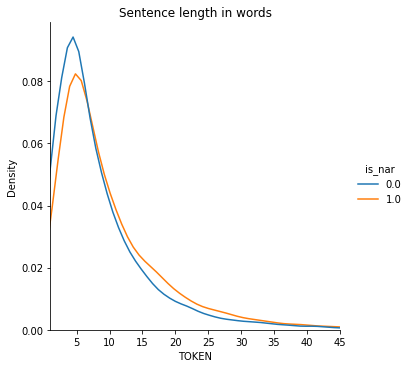

In [63]:
plt.figure(figsize = (8,15))
# sent_len_words = merged_db.groupby(['doc_idx','merged_idx'])
sent_len_sns =  sns.displot(data=merged_db,
                            x='TOKEN',
                            kind='kde',
                            hue='is_nar',
                            common_norm=False
                           )
sent_len_sns.set(title="Sentence length in words",xlim=((1,45)))

[(1.0, 125.0)]

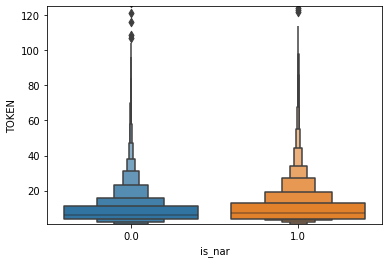

In [78]:
box_token=sns.boxenplot(data=merged_db, y="TOKEN", x="is_nar")
box_token.set(ylim=((1,125)))

[(1.0, 300.0), Text(0.5, 1.0, 'Sentence length in characters')]

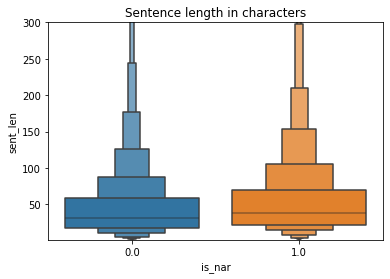

In [80]:
box_token=sns.boxenplot(data=merged_db, y="sent_len", x="is_nar")
box_token.set(ylim=((1,300)),title="Sentence length in characters")

In [52]:
count={}
bins_count={}
pdf={}
count['nar'], bins_count['nar'] = np.histogram(merged_db.query('is_nar == 1')['TOKEN'], bins=500)
  
# finding the PDF of the histogram using count values
pdf['nar'] = count['nar'] / sum(count['nar'])

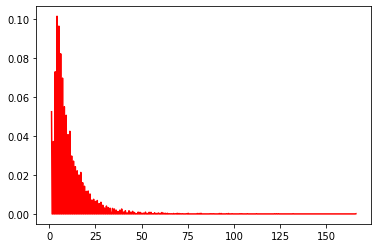

In [53]:
plt.plot(bins_count['nar'][1:], pdf['nar'], color="red", label="PDF")

In [54]:
count['nn'],bins_count['nn'] = np.histogram(merged_db.query('is_nar == 0')['TOKEN'], bins=500)
  
# finding the PDF of the histogram using count values
pdf['nn'] = count['nn'] / sum(count['nn'])

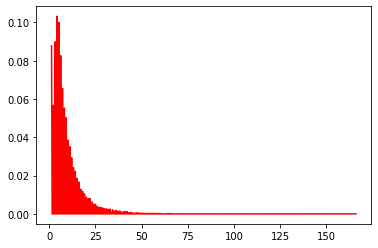

In [55]:
plt.plot(bins_count['nn'][1:], pdf['nn'], color="red", label="PDF")

<Figure size 576x1080 with 0 Axes>

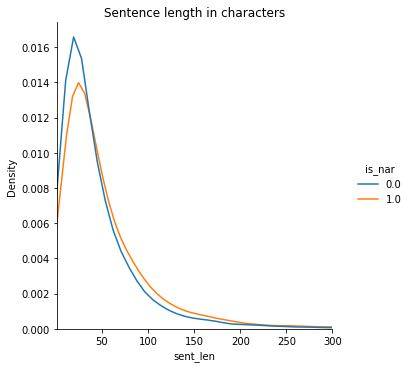

In [73]:
plt.figure(figsize = (8,15))
# sent_len_words = merged_db.groupby(['doc_idx','merged_idx'])
sent_len_sns =  sns.displot(data=merged_db,
                            x='sent_len',
                            kind='kde',
                            hue='is_nar',
                            common_norm=False
                           )
sent_len_sns.set(title="Sentence length in characters",xlim=((1,300)))

In [197]:
imp.reload(feature_utils)
sent_db = common_utils.concat_dbs(dir_name,"sent_db")#,defines.SENT_FEATURES)
sent_db

,file_idx,sent_idx,is_question,text,sent_idx_in_block,block_idx,is_nar,doc_idx,par_db_idx,par_idx_in_doc,par_pos_in_doc,par_type,block_type,nar_idx,sent_len,is_client,sent_idx_in_par,sent_pos_in_par,sent_pos_in_doc
0,1,0,0.000000,אז היום אנחנו נפגשים פה ב 123 אבל שבוע הבא בח...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.004878,therapist,not_nar,0.000000,50.000000,0,0,1.000000,0.001631
1,1,1,0.000000,כן,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.009756,client,not_nar,0.000000,2.000000,1,0,1.000000,0.003263
2,1,2,1.000000,אוקיי מה שלומך,0.000000,2.000000,0.000000,1.000000,2.000000,2.000000,0.014634,therapist,not_nar,0.000000,16.000000,0,0,1.000000,0.004894
3,1,3,0.000000,ברוך השם,0.000000,3.000000,0.000000,1.000000,3.000000,3.000000,0.019512,client,not_nar,0.000000,8.000000,1,0,1.000000,0.006525
4,1,4,0.000000,מחר יש לכם יום טיול,0.000000,4.000000,0.000000,1.000000,4.000000,4.000000,0.024390,therapist,not_nar,0.000000,19.000000,0,0,1.000000,0.008157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38429,80,525,0.000000,שאני מרגיש בהם לא נוח,3.000000,230.000000,0.000000,80.000000,222.000000,222.000000,0.991111,client,not_nar,0.000000,21.000000,1,3,0.666667,0.992453
38430,80,526,0.000000,אז כאילו למה למה אני מתגעגע,4.000000,230.000000,0.000000,80.000000,222.000000,222.000000,0.991111,client,not_nar,0.000000,27.000000,1,4,0.833333,0.994340
38431,80,527,0.000000,או למה אני למה אני רוצה,5.000000,230.000000,0.000000,80.000000,222.000000,222.000000,0.991111,client,not_nar,0.000000,23.000000,1,5,1.000000,0.996226
38432,80,528,1.000000,והצלחת לענות לעצמך,0.000000,231.000000,0.000000,80.000000,223.000000,223.000000,0.995556,therapist,not_nar,0.000000,19.000000,0,0,1.000000,0.998113


Total num of paragraph

In [198]:
(sent_db.groupby('doc_idx')['par_idx_in_doc'].max().sum()+79)/79

192.2405063291139

In [199]:
sent_db.groupby('doc_idx')['par_idx_in_doc'].max().median()

156.0

In [200]:
sent_db['text'].str.count(' ').sum()+sent_db.shape[0]

444702

In [201]:
sent_db.groupby('doc_idx').size().median()

471.0

In [202]:
doc_stat_db = pd.DataFrame()

def get_doc_statistic(doc_idx):
    sent_db = pd.read_csv(os.path.join(os.getcwd(),defines.PATH_TO_DFS,"{:02d}_sent_db.csv".format(i)),usecols=['is_nar','nar_idx','sent_len','is_client'])
    nar_num = sent_db['nar_idx'].nunique()
    avrg_sent_len_nar = sent_db.query('is_nar == 1')['sent_len'].mean()
    groupby(['doc_idx'])['nar_idx'].nunique()
    del sent_db

In [203]:
sent_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38434 entries, 0 to 38433
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   file_idx           38434 non-null  int64  
 1   sent_idx           38434 non-null  int64  
 2   is_question        38434 non-null  float64
 3   text               38434 non-null  object 
 4   sent_idx_in_block  38434 non-null  float64
 5   block_idx          38434 non-null  float64
 6   is_nar             38434 non-null  float64
 7   doc_idx            38434 non-null  float64
 8   par_db_idx         38434 non-null  float64
 9   par_idx_in_doc     38434 non-null  float64
 10  par_pos_in_doc     38434 non-null  float64
 11  par_type           38434 non-null  object 
 12  block_type         38434 non-null  object 
 13  nar_idx            38434 non-null  float64
 14  sent_len           38434 non-null  float64
 15  is_client          38434 non-null  int64  
 16  sent_idx_in_par    384

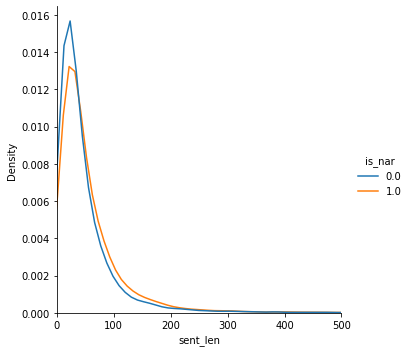

In [21]:
sent_len = sns.displot(data=sent_db,
                       x='sent_len',
                       hue='is_nar',
                       kind='kde',
                       common_norm=False,  # Normalize each distribution independently
                      )
sent_len.set(xlim=(0, 500))

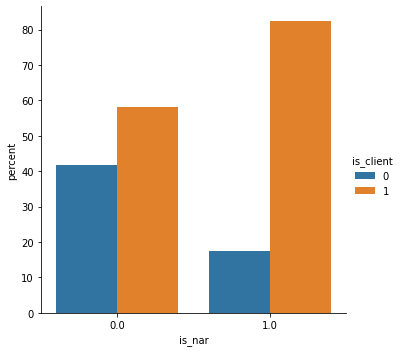

In [87]:
x,y = 'is_nar', 'is_client'

(sent_db
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

In [24]:
par_db = common_utils.concat_dbs(dir_name,"par_db",['par_len','par_type','is_nar'])
par_db

,doc_idx,par_idx,par_len,par_type,is_nar
0,1,0,49.000000,therapist,0.000000
1,1,1,3.000000,client,0.000000
2,1,2,17.000000,therapist,0.000000
3,1,3,14.000000,client,0.000000
4,1,4,22.000000,therapist,0.000000
...,...,...,...,...,...
15063,80,220,132.000000,client,0.000000
15064,80,221,97.000000,therapist,0.000000
15065,80,222,371.000000,client,0.000000
15066,80,223,20.000000,therapist,0.000000


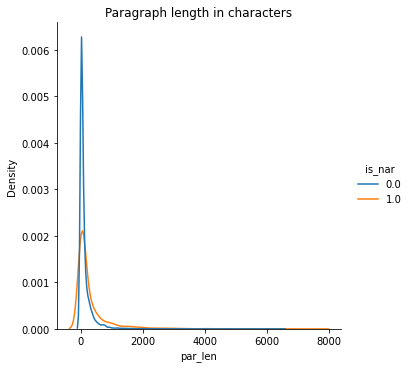

In [25]:
par_len_char = sns.displot(data=par_db,
                       x='par_len',
                       hue='is_nar',
                       kind='kde',
                       common_norm=False,  # Normalize each distribution independently
                      )
par_len_char.set(title='Paragraph length in characters')

### Chek distrib of par len in sentences

In [26]:
sent_db

,doc_idx,sent_idx,is_question,is_nar,par_idx_in_doc,sent_len,is_client,sent_idx_in_par,sent_pos_in_par,sent_pos_in_doc
0,1,0,0.000000,0.000000,0.000000,47.000000,0,0,1.000000,0.001724
1,1,1,0.000000,0.000000,1.000000,2.000000,1,0,1.000000,0.003448
2,1,2,1.000000,0.000000,2.000000,15.000000,0,0,1.000000,0.005172
3,1,3,0.000000,0.000000,3.000000,8.000000,1,0,1.000000,0.006897
4,1,4,0.000000,0.000000,4.000000,19.000000,0,0,1.000000,0.008621
...,...,...,...,...,...,...,...,...,...,...
36319,80,486,0.000000,0.000000,222.000000,21.000000,1,3,0.666667,0.991853
36320,80,487,0.000000,0.000000,222.000000,27.000000,1,4,0.833333,0.993890
36321,80,488,0.000000,0.000000,222.000000,23.000000,1,5,1.000000,0.995927
36322,80,489,1.000000,0.000000,223.000000,19.000000,0,0,1.000000,0.997963


In [101]:
par_len_count = sent_db.groupby(['doc_idx','par_idx_in_doc'])['sent_idx'].count()
par_len_count

doc_idx    par_idx_in_doc
1.000000   0.000000          1
           1.000000          1
           2.000000          1
           3.000000          1
           4.000000          1
                            ..
80.000000  220.000000        3
           221.000000        2
           222.000000        6
           223.000000        1
           224.000000        1
Name: sent_idx, Length: 14939, dtype: int64

In [102]:
par_len_count.describe()

count   14939.000000
mean        2.597363
std         4.101660
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        87.000000
Name: sent_idx, dtype: float64

In [30]:
# find par with max length
par_len_count.idxmax(),par_len_count.max()

((5, 19.0), 111)

In [31]:
par_len_count.reset_index(drop=True).median()

1.0

In [32]:
par_len_count.quantile(q=0.95)

8.0

In [33]:
par_len_count.quantile(q=0.5)

1.0

In [34]:
par_len_count.quantile(q=0.75)

2.0

<Figure size 1080x576 with 0 Axes>

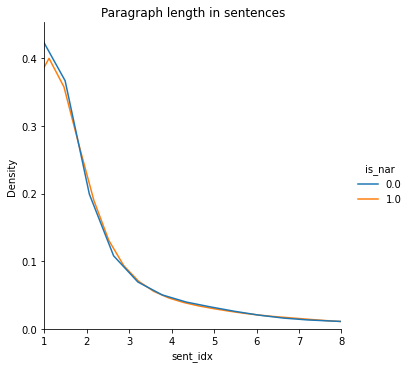

In [35]:
plt.figure(figsize = (15,8))
par_len_sent =  sns.displot(data=sent_db,x=par_len_count.reset_index(drop=True),
                            kind='kde',
                            hue='is_nar',
                            common_norm=False
                           )
par_len_sent.set(title="Paragraph length in sentences",xlim=((1,8)))

[Text(0.5, 1.0, 'Paragraph length in sentences')]

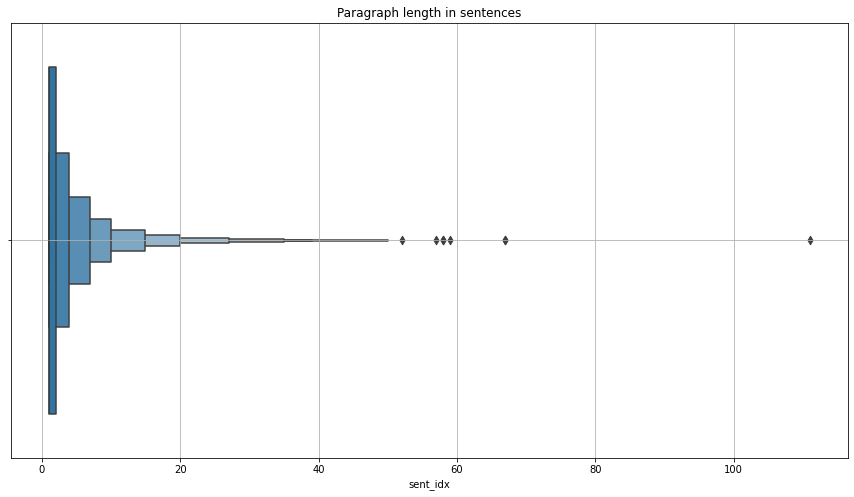

In [36]:
plt.figure(figsize = (15,8))
par_len_sent_b = sns.boxenplot(data=sent_db,
                               x=par_len_count.reset_index(drop=True),
                               hue='is_nar')
par_len_sent_b.grid()
par_len_sent_b.set(title="Paragraph length in sentences")